# 1. 라이브러리 불러오기 및 데이터셋 path설정

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False
path = 'dataset/'

# 2. 데이터 불러오기 및 정렬

In [26]:
row_data = pd.read_csv('{}v7_final.csv'.format(path), encoding='euc-kr') #, index_col='Unnamed: 0')
row_data.head()

,회사명,거래소코드,회계년도,산업코드,소속코드,상장일,상장폐지일,감사의견코드,총자본증가율,유형자산증가율,...,PCR(Price cash-flow ratio)(최고),PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),기업가치(EV)(백만원),EBITDA(백만원),EBITDA/매출액(%),EBITDA/금융비용(배),EBITDA/평균발행주식수(백만원),EV/EBITDA(배)
0,(주)CMG제약,58820,2007/12,32102.0,5.0,2001/08/31,NaN,UQ,120.08,215.25,...,0.0,0.0,149.75,20.92,69545.33,-1288.45,-71.74,0.00,-104.44,0.00
1,(주)CMG제약,58820,2008/12,32102.0,5.0,2001/08/31,NaN,UQ,56.55,55.67,...,0.0,0.0,9.13,1.49,-454.50,-3419.79,-31.64,-4.56,-221.19,NaN
2,(주)CMG제약,58820,2009/12,32102.0,5.0,2001/08/31,NaN,UQ,-33.92,-8.50,...,0.0,0.0,8.40,1.72,26517.58,-7100.69,-69.98,-6.80,-443.98,NaN
3,(주)CMG제약,58820,2010/12,32102.0,5.0,2001/08/31,NaN,UQ,5.66,-11.92,...,0.0,0.0,3.22,1.04,31200.74,-5598.06,-49.32,-5.51,-243.34,NaN
4,(주)CMG제약,58820,2011/12,32102.0,5.0,2001/08/31,NaN,UQ,14.18,7.86,...,0.0,0.0,3.14,1.05,37758.74,2038.64,11.48,11.24,46.75,18.52


In [27]:
row_data = row_data[~row_data['산업코드'].isnull()]

In [28]:
row_data['소속코드'] = row_data['소속코드'].astype(int)
row_data['산업코드'] = row_data['산업코드'].astype(int)

In [29]:
row_data['소속코드'] = row_data['소속코드'].astype(str).str.zfill(2)
row_data['산업코드'] = row_data['산업코드'].astype(str).str.zfill(6)
row_data['거래소코드'] = row_data['거래소코드'].astype(str).str.zfill(6)

In [30]:
row_data['산업대분류'] = row_data['산업코드'].str[0:2]

In [31]:
# 원데이터에서 에초에 모집단으로 선정한 산업대분류 코드 3, 10, 7을 추출하여 새로운 data를 만들어줍니다.
data = row_data[(row_data['산업대분류'] == '03') |
                (row_data['산업대분류'] == '10') | 
                (row_data['산업대분류'] == '07')]

data['회계년도_new']=data['회계년도'].str[0:4].astype(int)
data['상장일_new']=data['상장일'].str[0:4].astype(int)

/var/folders/1v/ctxpzb994v98h43xyk972tmc0000gn/T/ipykernel_10918/845699834.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['회계년도_new']=data['회계년도'].str[0:4].astype(int)
/var/folders/1v/ctxpzb994v98h43xyk972tmc0000gn/T/ipykernel_10918/845699834.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['상장일_new']=data['상장일'].str[0:4].astype(int)


In [32]:
# 부도여부 칼럼 형성
data.loc[((data['감사의견코드'] == 'DS') | 
          (data['감사의견코드'] == 'DU')) & 
         (data['소속코드'].isin(['03','04','06'])), 
         '부도여부'] = '1'

data['부도여부'] = data['부도여부'].fillna('0')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/var/folders/1v/ctxpzb994v98h43xyk972tmc0000gn/T/ipykernel_10918/3089269643.py:7: SettingWithCopyWarning: 
A value is tr

In [33]:
# 초기 데이터 셋에서 부도 기업의 행 수
data['부도여부'].value_counts()

0    20934
1      249
Name: 부도여부, dtype: int64

KeyboardInterrupt: 

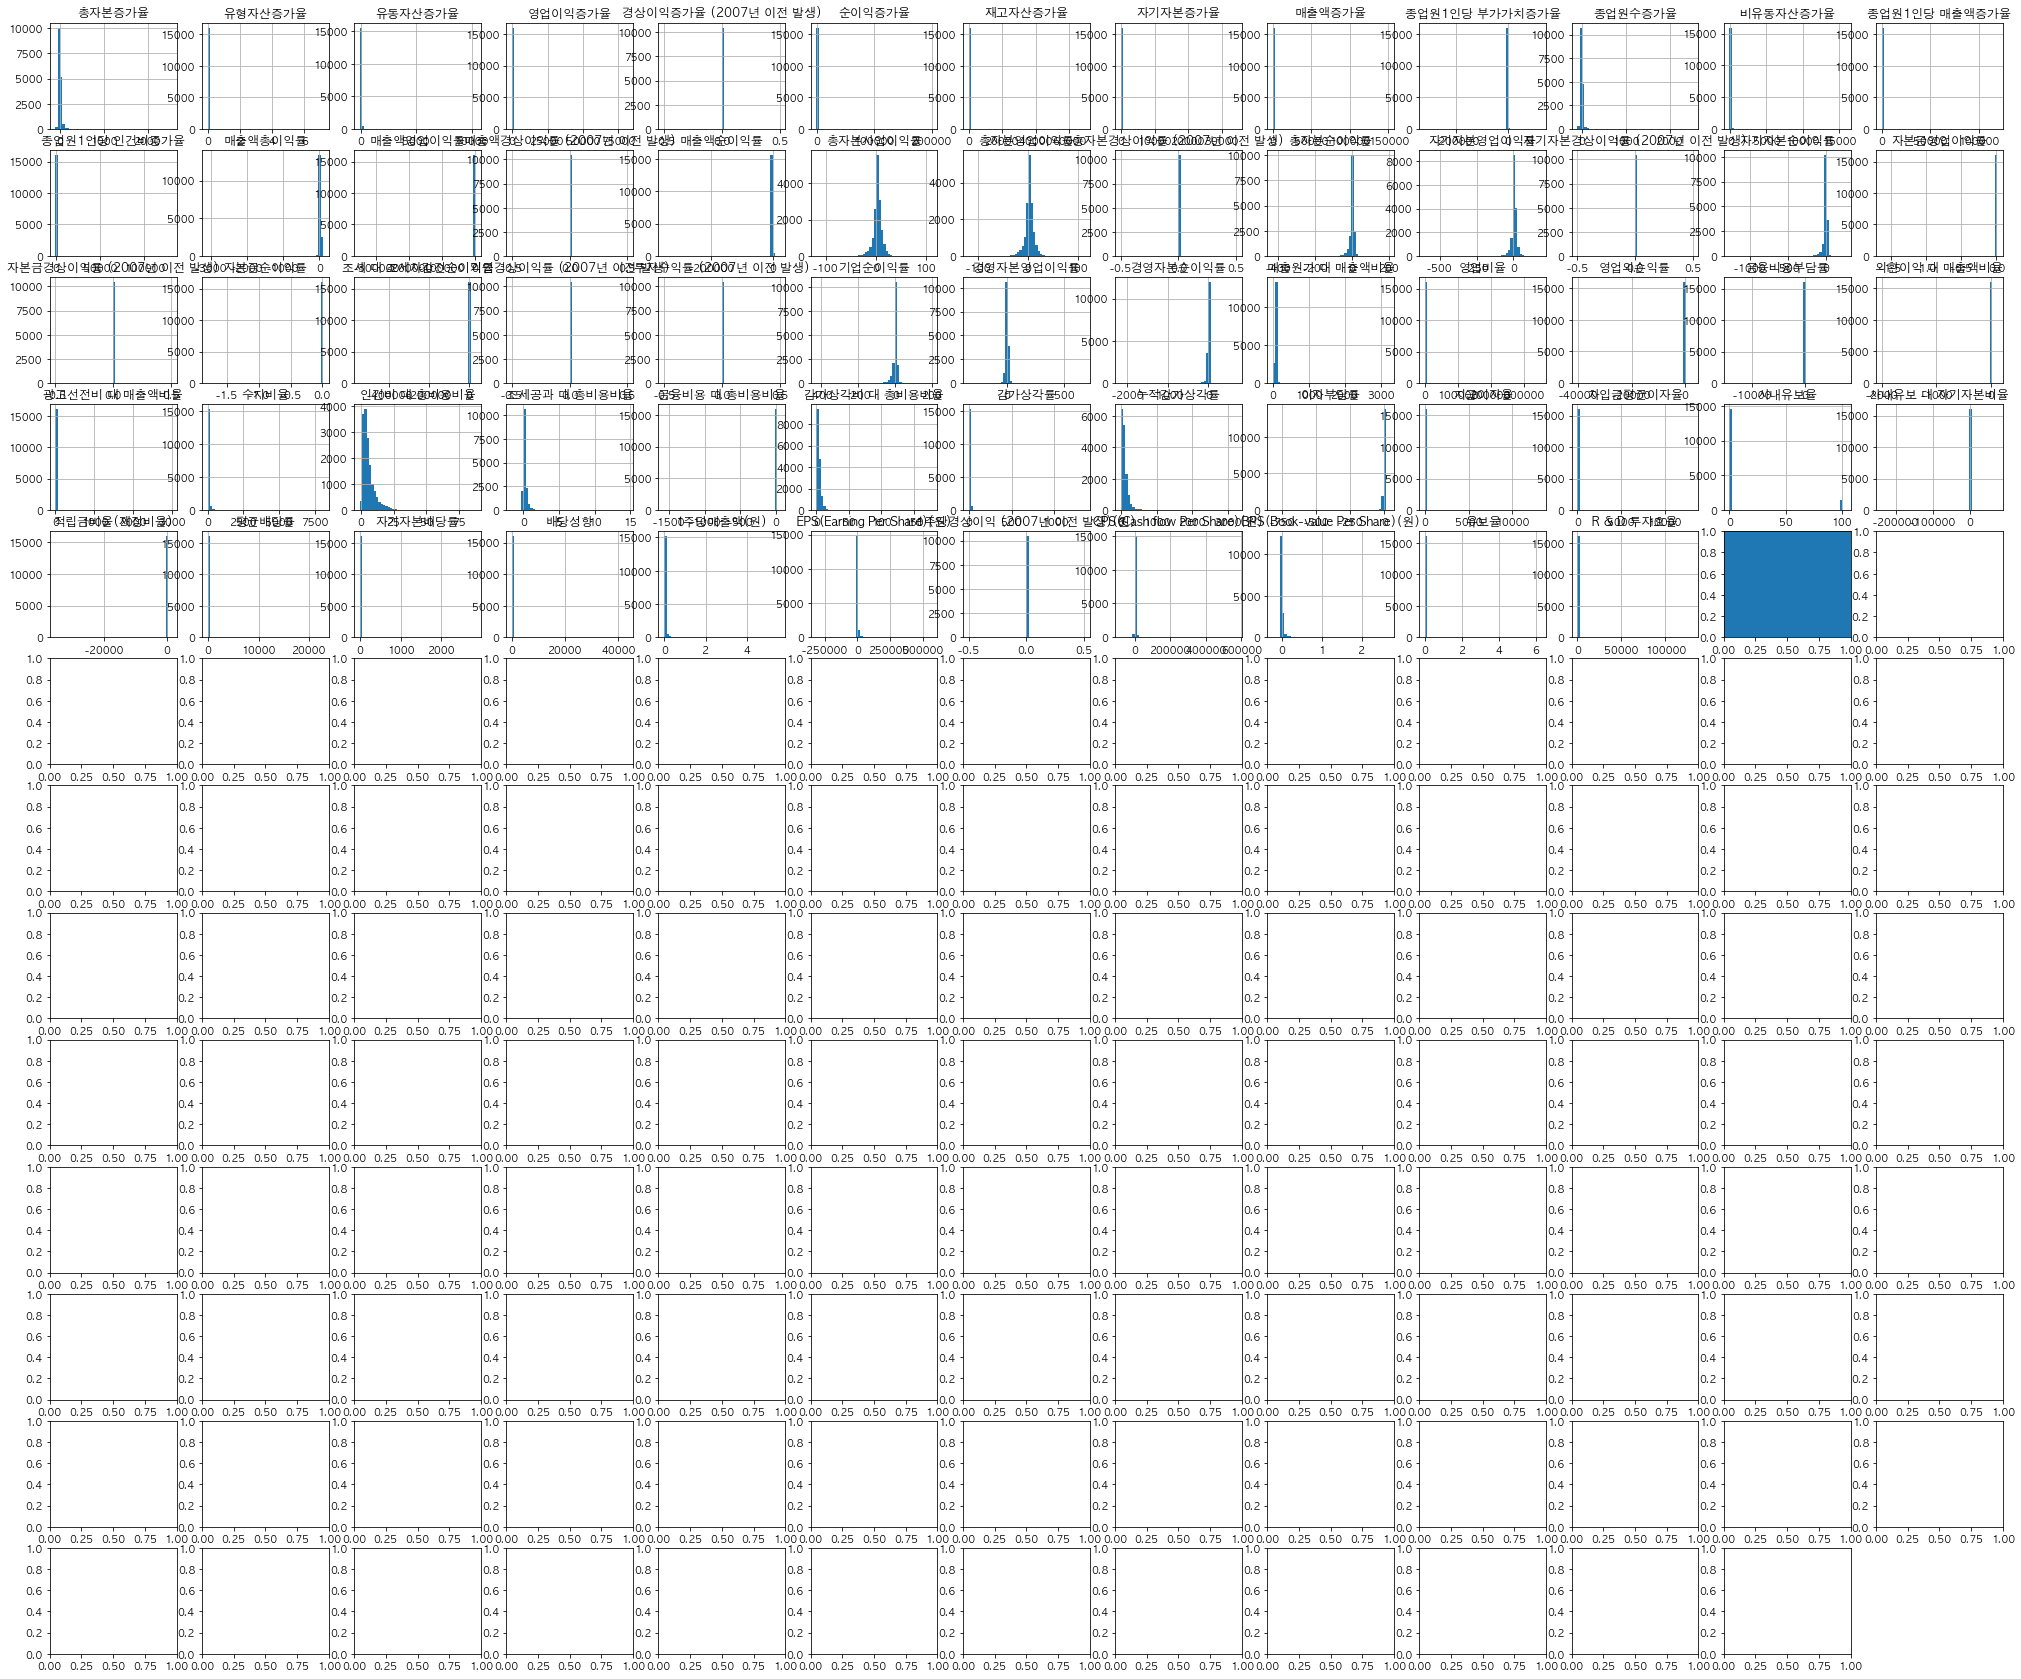

In [34]:
data[data['산업대분류'] == '03'].hist(figsize = (35,30), bins = 50)
plt.show()

# 3. 전처리 시행
## 3-1. 회사명이 같은데 거래소코드가 다른 경우 (워드파일 4-A)

- check를 통해서 기업 리스트를 뽑아봄
- check_df를 통해서 check 기업의 데이터를 확인해봄

In [ ]:
check = data.groupby(['회사명'])['거래소코드'].nunique().reset_index()
check.rename(columns={'거래소코드':'거래소코드_갯수'}, inplace=True)
check = check[ check['거래소코드_갯수']>1]
# check

In [ ]:
check_df = data[data['회사명'].isin(check['회사명'].tolist())]
check_df = check_df.reset_index()
# check_df

In [ ]:
# 회사명이 같은데 거래소코드가 다른 경우를 대상으로 행 개수를 출력해봄
check_df.groupby(['회사명','거래소코드'])['index'].count().reset_index()

,회사명,거래소코드,index
0,(주)본느,226340,6
1,(주)본느,242420,2
2,(주)세화피앤씨,085980,4
3,(주)세화피앤씨,252500,5
4,(주)신성이엔지,011930,14
5,(주)신성이엔지,104110,8
6,(주)아이엘사이언스,122050,1
7,(주)아이엘사이언스,307180,3
8,(주)알로이스,271400,2
9,(주)알로이스,297570,3


In [ ]:
# 합병등과 같은 이유로 거래소코드가 2개인 경우 데이터프레임에서 삭제
data = data[~data['회사명'].isin(check_df['회사명'])]

In [ ]:
data['부도여부'].value_counts()

0    20708
1      248
Name: 부도여부, dtype: int64

### 3-1. 결론 : 버린다.
- 예를들어 7월에 합병되는 경우, 피인수기업 데이터는 1/1~07/01의 데이터를 기반으로 재무비율을 형성하고 인수기업의 경우에는 피인수기업의 재무적 정보를 그대로 가져오는 등의 경우의 수가 다양하기 때문에, 이러한 데이터를 drop하는 것으로 생각한다.
- 또한, 해당 기업 25개 중 부도로 집계된 기업은 1개에 불과하다. 따라서 정상기업이 많고 약 2250개에서 25개는 1%이므로 이는 제거하더라도 모델의 성능에 영향을 덜 미칠 것으로 판단된다. 따라서 제거한다.) 
- 위의 부도여부가 1인 값은 앞과 비교했을 때, 248개로 1개만 감소한 것을 확인할 수 있다.

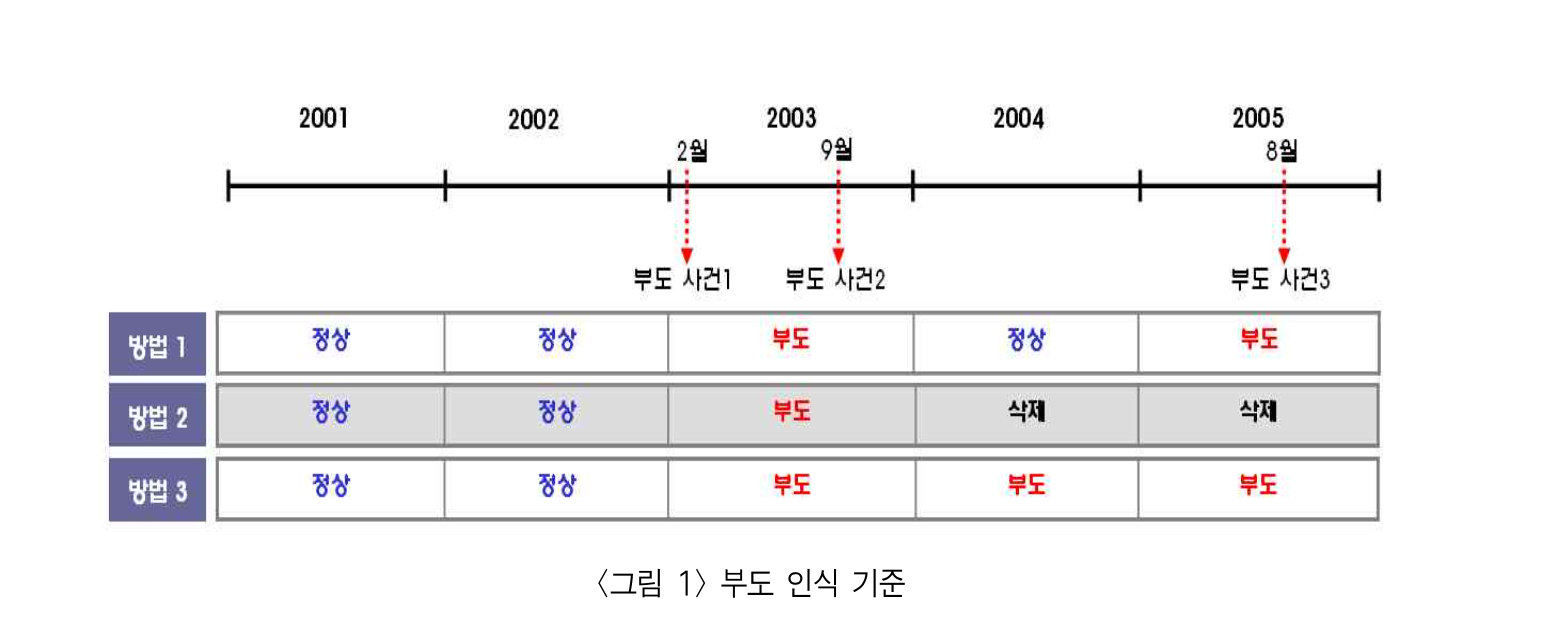

In [ ]:
import IPython
url = "https://user-images.githubusercontent.com/87803612/141818459-6bee4365-6bb7-4c2c-ab50-738241107275.png"
IPython.display.Image(url, width = 941)

## 3-2 부도, 정상 기업 데이터 정리 : 워드(4- B)
- 방법 2 : 최초 부도가 발생한 시점 이후에, 데이터는 삭제해야 한다.

In [ ]:
data['left_on'] = data['회계년도_new']-1
data['회계년도_new'].astype(int)

left_df = data[['회사명', '거래소코드','부도여부','left_on']]

In [ ]:
merged_df = pd.merge(left_df, data, left_on=['회사명','거래소코드','left_on'], 
                     right_on = ['회사명','거래소코드','회계년도_new'], how='left')
merged_df.head()
# 여기에 Nan값이 나오는 이유
# left_on_x의 처음 값이 2006년인데, 우리는 데이터셋을 에초에 2007년부터 불러왔기 때문에 없는 것임.
# 따라서 해당 행을 drop해야 한다.

,회사명,거래소코드,부도여부_x,left_on_x,회계년도,산업코드,소속코드,상장일,상장폐지일,감사의견코드,...,EBITDA(백만원),EBITDA/매출액(%),EBITDA/금융비용(배),EBITDA/평균발행주식수(백만원),EV/EBITDA(배),산업대분류,회계년도_new,상장일_new,부도여부_y,left_on_y
0,(주)CMG제약,058820,0,2006,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(주)CMG제약,058820,0,2007,2007/12,032102,05,2001/08/31,NaN,UQ,...,-1288.45,-71.74,0.00,-104.44,0.0,03,2007.0,2001.0,0,2006.0
2,(주)CMG제약,058820,0,2008,2008/12,032102,05,2001/08/31,NaN,UQ,...,-3419.79,-31.64,-4.56,-221.19,NaN,03,2008.0,2001.0,0,2007.0
3,(주)CMG제약,058820,0,2009,2009/12,032102,05,2001/08/31,NaN,UQ,...,-7100.69,-69.98,-6.80,-443.98,NaN,03,2009.0,2001.0,0,2008.0
4,(주)CMG제약,058820,0,2010,2010/12,032102,05,2001/08/31,NaN,UQ,...,-5598.06,-49.32,-5.51,-243.34,NaN,03,2010.0,2001.0,0,2009.0


In [ ]:
# 2006년 데이터는 애초에 없기에 그런 행들을 삭제해준다.
merged_df = merged_df[~merged_df['회계년도'].isnull()]

merged_df.drop(columns = ['부도여부_y','left_on_x','left_on_y'], inplace=True)
merged_df.rename(columns = {'부도여부_x': '차기부도여부'}, inplace=True)
merged_df.sort_values(by=['회사명', '회계년도'], inplace=True)
merged_df.shape

# 18723 행

(18723, 178)

In [ ]:
print('부도 기업의 데이터 행 수 : {}'.format(merged_df['차기부도여부'].value_counts()[1]))
print('다음 사업연도에 감삭결과가 DS, DU 이거나 관리종목 혹은 상장 폐지로 되는 기업의 개수 : {}'.
      format(merged_df[merged_df['차기부도여부']=='1']['회사명'].nunique()))

부도 기업의 데이터 행 수 : 234
다음 사업연도에 감삭결과가 DS, DU 이거나 관리종목 혹은 상장 폐지로 되는 기업의 개수 : 214


In [ ]:
first_bankruptcy=pd.DataFrame(columns=['회사명'])
first_bankruptcy['회사명'] = merged_df['회사명'].unique()

# merged_df에서 고유한 회사명만 가져가게 된다.
# first_bankruptcy

In [ ]:
# check에는 234개의 부도 데이터가 들어가게 된다. (즉, 기업이 중복되는 행이 존재하는 것)
check = merged_df[merged_df['차기부도여부']=='1'][['회사명','회계년도_new','차기부도여부']].sort_values(by=['회사명', '회계년도_new', '차기부도여부'], ascending=[True, True, True])
# 중복되는 기업 행을 제거하기 위해 시행하는 것으로 keep first는 중복되는 값 중 앞에 있는 것을 남기겠다는 것
check = check.drop_duplicates(['회사명'], keep='first')
check.drop(columns='차기부도여부', inplace=True)
# 따라서 check는 214개의 부도 데이터를 가져가게 된다.
# check

In [ ]:
# 고유한 기업 2126개에 부도 기업 214개를 merge 하게되면 회계년도_new에 부도난 시점이 들어가게 됨.
first_bankruptcy = pd.merge(first_bankruptcy, check, how ='left', on='회사명')
# 하지만, 정상기업의 경우는 Nan 값이 들어가기 때문에 fillna를 시행한다
first_bankruptcy['회계년도_new'] = first_bankruptcy['회계년도_new'].fillna(2021.0)
# 여기서 회계년도_new + 1 년에 부도가 발생한 것이기 때문에 회계년도_new 를 첫부도일 -1 이라는 더 직관적인 명칭으로 변경한다
first_bankruptcy.rename(columns={'회계년도_new' : '첫_부도일-1'}, inplace=True)
# first_bankruptcy

In [ ]:
# 2021.0이 아닌 값을 가지게 되는 기업은 총 214개로 이는 고유한 부도기업 데이터임
# first_bankruptcy[first_bankruptcy['첫_부도일-1']!=2021.0]

In [ ]:
# iterrows 를 사용하는 법
# for row, col in first_bankruptcy[0:5].iterrows():
#   print(row, col['회사명'], col['첫_부도일-1'])

In [ ]:
# 먼저 빈 데이터 프레임, 리스트를 형성해준다.
final_df  = pd.DataFrame()
tmp_list = []

for row, col  in first_bankruptcy.iterrows():
  tmp = merged_df[(merged_df['회사명'] == col['회사명']) & (merged_df['회계년도_new']<= col['첫_부도일-1'])]
  tmp_list.append(tmp)
final_df = pd.concat(tmp_list)
final_df

,회사명,거래소코드,차기부도여부,회계년도,산업코드,소속코드,상장일,상장폐지일,감사의견코드,총자본증가율,...,PSR(Price sales ratio)(최저),기업가치(EV)(백만원),EBITDA(백만원),EBITDA/매출액(%),EBITDA/금융비용(배),EBITDA/평균발행주식수(백만원),EV/EBITDA(배),산업대분류,회계년도_new,상장일_new
1,(주)CMG제약,058820,0,2007/12,032102,05,2001/08/31,NaN,UQ,120.08,...,20.92,69545.33,-1288.45,-71.74,0.00,-104.44,0.00,03,2007.0,2001.0
2,(주)CMG제약,058820,0,2008/12,032102,05,2001/08/31,NaN,UQ,56.55,...,1.49,-454.50,-3419.79,-31.64,-4.56,-221.19,NaN,03,2008.0,2001.0
3,(주)CMG제약,058820,0,2009/12,032102,05,2001/08/31,NaN,UQ,-33.92,...,1.72,26517.58,-7100.69,-69.98,-6.80,-443.98,NaN,03,2009.0,2001.0
4,(주)CMG제약,058820,0,2010/12,032102,05,2001/08/31,NaN,UQ,5.66,...,1.04,31200.74,-5598.06,-49.32,-5.51,-243.34,NaN,03,2010.0,2001.0
5,(주)CMG제약,058820,0,2011/12,032102,05,2001/08/31,NaN,UQ,14.18,...,1.05,37758.74,2038.64,11.48,11.24,46.75,18.52,03,2011.0,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20951,흥구석유(주),024060,0,2015/12,074607,05,1994/12/07,NaN,UQ,12.89,...,0.20,48071.55,856.25,0.55,15.54,57.08,56.14,07,2015.0,1994.0
20952,흥구석유(주),024060,0,2016/12,074607,05,1994/12/07,NaN,UQ,1.39,...,0.28,55934.79,1348.52,0.94,10.71,89.90,41.48,07,2016.0,1994.0
20953,흥구석유(주),024060,0,2017/12,074607,05,1994/12/07,NaN,UQ,0.98,...,0.24,46036.63,1147.56,0.74,9.02,76.50,40.12,07,2017.0,1994.0
20954,흥구석유(주),024060,0,2018/12,074607,05,1994/12/07,NaN,UQ,-5.89,...,0.24,36557.57,1451.79,0.87,16.83,96.79,25.18,07,2018.0,1994.0


In [ ]:
print(final_df[final_df['차기부도여부']=='1']['회사명'].nunique())
print(final_df[final_df['차기부도여부']=='0']['회사명'].nunique())


214
2093


In [ ]:
final_df.to_csv('{}final_df.csv'.format(path))

### 3-2 완료 (final_df 저장)

- 방법 2를 체택하였으므로, 최초 부도 시점 이후의 데이터는 지워진 상태가 되었음.
- 부도기업의 수는 214개, 정상기업의 수는 2093개이다.

## 3-3 Nan 값 처리 (4-C)

In [ ]:
final_df['sum_nan'] = final_df.isnull().sum(1)
final_df = final_df.loc[final_df['sum_nan'] < 165]

In [49]:
final_df['sum_nan'].reset_index()

KeyError: 'sum_nan'

In [ ]:
# 열을 기준으로 null값이 얼마나 분포하고 있는지 확인해본다.
check = final_df.isnull().sum(0).reset_index()
check.sort_values(by=0, ascending=False, inplace=True)
check

,index,0
7,상장폐지일,16850
136,종업원1인당 경상이익 (2007년 이전 발생)(백만원),5312
39,투자수익률 (2007년 이전 발생),5311
67,1주당경상이익 (2007년 이전 발생)(원),5311
38,기업경상이익률 (2007년 이전 발생),5311
...,...,...
68,CPS(Cash flow Per Share)(원),0
69,BPS(Book-value Per Share)(원),0
70,유보율,0
71,R & D 투자효율,0


In [ ]:
# nan값이 많은 상위 10개를 보면 2007년 이전에 발생한 항목이 대다수이다.
# 따라서 상장폐지일을 포함한 2007년 이전 컬럼을 리스트로 뽑고 삭제해준다.
nan_list = check['index'][0:10].tolist()
# nan_list
final_df.drop(columns=nan_list, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
print('EV/EBITDA(배) 컬럼의 nan 개수 :', final_df['EV/EBITDA(배)'].isnull().sum())

EV/EBITDA(배) 컬럼의 nan 개수 : 626


In [ ]:
final_df['EV/EBITDA(배)'] = round(final_df['기업가치(EV)(백만원)']/final_df['EBITDA(백만원)'], 3)
final_df.loc[(final_df['EV/EBITDA(배)'] < 0), 'EV/EBITDA(배)'] = 0

/var/folders/1v/ctxpzb994v98h43xyk972tmc0000gn/T/ipykernel_7140/3355480489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['EV/EBITDA(배)'] = round(final_df['기업가치(EV)(백만원)']/final_df['EBITDA(백만원)'], 3)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
final_df = final_df.fillna(0)

In [ ]:
final_df['sum_nan'] = final_df.isnull().sum(1)
final_df['sum_nan'].value_counts()

0    18445
Name: sum_nan, dtype: int64

In [ ]:
check = final_df['EV/EBITDA(배)'].value_counts().reset_index()

In [ ]:
check.sort_values(by='index')

,index,EV/EBITDA(배)
0,0.000,3387
4432,0.010,1
10015,0.013,1
9093,0.015,1
2405,0.016,2
...,...,...
7435,9217.371,1
9445,11894.208,1
4445,12655.564,1
11683,16658.717,1


In [ ]:
final_df = final_df[final_df['EBITDA(백만원)'] != 0]

In [ ]:
final_df.shape

(18441, 169)

In [ ]:
final_df.to_csv('{}final_df_fillna.csv'.format(path))

In [ ]:
final_df = pd.read_csv('{}final_df_fillna.csv'.format(path))
final_df

,회사명,거래소코드,차기부도여부,회계년도,산업코드,소속코드,상장일,감사의견코드,총자본증가율,유형자산증가율,...,PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),기업가치(EV)(백만원),EBITDA(백만원),EBITDA/매출액(%),EBITDA/금융비용(배),EBITDA/평균발행주식수(백만원),EV/EBITDA(배),산업대분류
0,(주)CMG제약,58820,0,2007.0,32102,5.0,2001/08/31,UQ,120.08,215.25,...,0.00,149.75,20.92,69545.33,-1288.45,-71.74,0.00,-104.44,0.000,3
1,(주)CMG제약,58820,0,2008.0,32102,5.0,2001/08/31,UQ,56.55,55.67,...,0.00,9.13,1.49,-454.50,-3419.79,-31.64,-4.56,-221.19,0.133,3
2,(주)CMG제약,58820,0,2009.0,32102,5.0,2001/08/31,UQ,-33.92,-8.50,...,0.00,8.40,1.72,26517.58,-7100.69,-69.98,-6.80,-443.98,0.000,3
3,(주)CMG제약,58820,0,2010.0,32102,5.0,2001/08/31,UQ,5.66,-11.92,...,0.00,3.22,1.04,31200.74,-5598.06,-49.32,-5.51,-243.34,0.000,3
4,(주)CMG제약,58820,0,2011.0,32102,5.0,2001/08/31,UQ,14.18,7.86,...,0.00,3.14,1.05,37758.74,2038.64,11.48,11.24,46.75,18.522,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18438,흥구석유(주),24060,0,2015.0,74607,5.0,1994/12/07,UQ,12.89,-0.74,...,6.93,0.32,0.20,48071.55,856.25,0.55,15.54,57.08,56.142,7
18439,흥구석유(주),24060,0,2016.0,74607,5.0,1994/12/07,UQ,1.39,-5.61,...,35.62,0.43,0.28,55934.79,1348.52,0.94,10.71,89.90,41.479,7
18440,흥구석유(주),24060,0,2017.0,74607,5.0,1994/12/07,UQ,0.98,-0.56,...,24.31,0.34,0.24,46036.63,1147.56,0.74,9.02,76.50,40.117,7
18441,흥구석유(주),24060,0,2018.0,74607,5.0,1994/12/07,UQ,-5.89,-0.36,...,7.82,0.40,0.24,36557.57,1451.79,0.87,16.83,96.79,25.181,7


In [180]:
ind_03 = final_df.loc[final_df['산업대분류']== 3]
ind_07 = final_df.loc[final_df['산업대분류']== 7]
ind_10 = final_df.loc[final_df['산업대분류']==10]

In [171]:
ind_03['총자본증가율'].isnull().value_counts()

False    14193
Name: 총자본증가율, dtype: int64

In [101]:
col_list = final_df.columns[8:-1]
for i in col_list:
    print(i)

총자본증가율
유형자산증가율
유동자산증가율
영업이익증가율
순이익증가율
재고자산증가율
자기자본증가율
매출액증가율
종업원1인당 부가가치증가율
종업원수증가율
비유동자산증가율
종업원1인당 매출액증가율
종업원1인당 인건비증가율
매출액총이익률
매출액영업이익률
매출액순이익률
총자본사업이익률
총자본영업이익률
총자본순이익률
자기자본영업이익률
자기자본순이익률
자본금영업이익률
자본금순이익률
조세 대 조세차감전순이익률
기업순이익률
경영자본영업이익률
경영자본순이익률
매출원가 대 매출액비율
영업비율
영업외손익률
금융비용부담률
외환이익 대 매출액비율
광고선전비 대 매출액비율
수지비율
인건비 대 총비용비율
조세공과 대 총비용비율
금융비용 대 총비용비율
감가상각비 대 총비용비율
감가상각률
누적감가상각률
이자부담률
지급이자율
차입금평균이자율
사내유보율
사내유보 대 자기자본비율
적립금비율(재정비율)
평균배당률
자기자본배당률
배당성향
1주당매출액(원)
EPS(Earning Per Share)(원)
CPS(Cash flow Per Share)(원)
BPS(Book-value Per Share)(원)
유보율
R & D 투자효율
1주당영업이익(원)
유동자산구성비율
재고자산 대 유동자산비율
유동자산 대 비유동자산비율
당좌자산구성비율
비유동자산구성비율
자기자본구성비율
타인자본구성비율
자기자본배율
비유동비율
비유동장기적합률
유동비율
당좌비율
현금비율
원재료비율
매출채권비율
재고자산 대 순운전자본비율
매출채권 대 매입채무비율
매출채권 대 상
매입채무 대 재고자산비율
부채비율
유동부채비율
단기차입금 대 총차입금비율
비유동부채비율
비유동부채 대 순운전자본비율
순운전자본비율
차입금의존도
차입금비율
이자보상배율(이자비용)
이자보상배율(순금융비용)
유보액대비율
유보액 대 납입자본배율
유동자산집중도
비유동자산집중도
투자집중도
CASH FLOW 대 부채비율
CASH FLOW 대 차입금비율
CASH FLOW 대 총자본비율
CASH FLOW 대 매출액비율
영업이익대비이자보상배율
총자본회전률
경영자본회전률
자기자본회전률
자본금

In [ ]:
# 먼저 빈 데이터 프레임, 리스트를 형성해준다.
final_df  = pd.DataFrame()
tmp_list = []

for row, col  in first_bankruptcy.iterrows():
  tmp = merged_df[(merged_df['회사명'] == col['회사명']) & (merged_df['회계년도_new']<= col['첫_부도일-1'])]
  tmp_list.append(tmp)
final_df = pd.concat(tmp_list)
final_df

In [152]:
ind_03['회계년도'].dtype

dtype('float64')

In [162]:
from scipy.stats import skew, describe
from tqdm import tqdm

In [181]:
fucking_company = []
for i in tqdm(col_list[:2]):
  Q1 = np.quantile(ind_03[i], 0.25)
  Q3 = np.quantile(ind_03[i],0.75)

  minimum = Q1 - 1.5 * (Q3-Q1)
  maximum = Q3 + 1.5 * (Q3-Q1)

  outlier_df = ind_03[(minimum > ind_03[i]) | (ind_03[i] > maximum)]
  inlier_df = ind_03[(minimum <= ind_03[i]) & (ind_03[i] <= maximum)]

  for row, col  in outlier_df.iterrows():
    tmp = inlier_df[ (inlier_df['회사명'] == col['회사명']) & (inlier_df['회계년도'] < col['회계년도']) ]
  
    if len(tmp) == 0 :
      fucking_company.append(row)
    else:
      print(tmp(index=False))
      tmp.sort_values(by ="회계년도", ascending = True, inplace = True)
      tmp.drop_duplicates(['회사명'], keep='last', inplace=True)
      ind_03.loc[(ind_03['회사명'] == col['회사명']) & (ind_03['회계년도']== col['회계년도']),i] = tmp[i]

  0%|          | 0/2 [00:00<?, ?it/s]


ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

In [178]:
ind_03.head(10)

,회사명,거래소코드,차기부도여부,회계년도,산업코드,소속코드,상장일,감사의견코드,총자본증가율,유형자산증가율,...,PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),기업가치(EV)(백만원),EBITDA(백만원),EBITDA/매출액(%),EBITDA/금융비용(배),EBITDA/평균발행주식수(백만원),EV/EBITDA(배),산업대분류
0,(주)CMG제약,58820,0,2007.0,32102,5.0,2001/08/31,UQ,120.08,215.25,...,0.00,149.75,20.92,69545.33,-1288.45,-71.74,0.00,-104.44,0.000,3
1,(주)CMG제약,58820,0,2008.0,32102,5.0,2001/08/31,UQ,56.55,55.67,...,0.00,9.13,1.49,-454.50,-3419.79,-31.64,-4.56,-221.19,0.133,3
2,(주)CMG제약,58820,0,2009.0,32102,5.0,2001/08/31,UQ,-33.92,-8.50,...,0.00,8.40,1.72,26517.58,-7100.69,-69.98,-6.80,-443.98,0.000,3
3,(주)CMG제약,58820,0,2010.0,32102,5.0,2001/08/31,UQ,5.66,-11.92,...,0.00,3.22,1.04,31200.74,-5598.06,-49.32,-5.51,-243.34,0.000,3
4,(주)CMG제약,58820,0,2011.0,32102,5.0,2001/08/31,UQ,14.18,7.86,...,0.00,3.14,1.05,37758.74,2038.64,11.48,11.24,46.75,18.522,3
5,(주)CMG제약,58820,0,2012.0,32102,5.0,2001/08/31,UQ,NaN,-4.02,...,0.00,8.37,1.51,102635.81,-2652.62,-16.32,-4.89,-54.30,0.000,3
6,(주)CMG제약,58820,0,2013.0,32102,5.0,2001/08/31,UQ,-1.80,16.63,...,0.00,8.74,3.64,60446.48,1929.83,9.50,1.70,22.28,31.322,3
7,(주)CMG제약,58820,0,2014.0,32102,5.0,2001/08/31,UQ,3.87,NaN,...,104.13,6.40,3.34,71714.82,1910.86,8.40,15.56,22.06,37.530,3
8,(주)CMG제약,58820,0,2015.0,32102,5.0,2001/08/31,UQ,-2.64,-5.37,...,33.03,12.41,2.95,183741.02,-680.83,-2.52,-8.53,-7.71,0.000,3
9,(주)CMG제약,58820,0,2016.0,32102,5.0,2001/08/31,UQ,NaN,-5.14,...,47.43,25.18,4.78,343540.52,3831.42,11.62,0.00,41.96,89.664,3


In [176]:
ind_03[ind_03['총자본증가율'].isnull()]

,회사명,거래소코드,차기부도여부,회계년도,산업코드,소속코드,상장일,감사의견코드,총자본증가율,유형자산증가율,...,PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),기업가치(EV)(백만원),EBITDA(백만원),EBITDA/매출액(%),EBITDA/금융비용(배),EBITDA/평균발행주식수(백만원),EV/EBITDA(배),산업대분류
5,(주)CMG제약,58820,0,2012.0,32102,5.0,2001/08/31,UQ,NaN,-4.02,...,0.00,8.37,1.51,102635.81,-2652.62,-16.32,-4.89,-54.30,0.000,3
9,(주)CMG제약,58820,0,2016.0,32102,5.0,2001/08/31,UQ,NaN,-5.14,...,47.43,25.18,4.78,343540.52,3831.42,11.62,0.00,41.96,89.664,3
12,(주)CMG제약,58820,0,2019.0,32102,5.0,2001/08/31,UQ,NaN,39.67,...,87.55,10.01,4.22,572007.84,4709.46,8.03,548.04,43.25,121.459,3
16,(주)DB하이텍,990,0,2010.0,32601,1.0,1975/12/12,UQ,NaN,NaN,...,0.00,0.94,0.39,1142961.11,134669.06,22.69,1.34,3171.61,8.487,3
47,(주)MH에탄올,23150,0,2014.0,31101,1.0,1996/12/24,UQ,NaN,5.74,...,4.09,1.69,0.43,84299.50,9574.42,19.55,6.15,1297.61,8.805,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18404,휴림로봇(주),90710,0,2014.0,32902,5.0,2006/12/05,UQ,NaN,-7.72,...,0.00,1.36,0.57,41240.69,-4315.28,-15.14,-4.39,-493.67,0.000,3
18406,휴림로봇(주),90710,0,2016.0,32902,5.0,2006/12/05,UQ,NaN,-3.48,...,0.00,2.06,0.72,51379.40,2571.19,5.82,6.16,270.85,19.983,3
18407,휴림로봇(주),90710,0,2017.0,32902,5.0,2006/12/05,UQ,NaN,-2.40,...,12.16,3.68,1.25,163982.74,5031.44,7.24,2.18,94.58,32.592,3
18408,휴림로봇(주),90710,0,2018.0,32902,5.0,2006/12/05,UQ,NaN,19.16,...,0.00,6.65,1.98,84632.31,-6759.27,-22.00,-2.80,-97.19,0.000,3


In [174]:
ind_03['유형자산증가율'].isnull().value_counts()

False    12484
True      1709
Name: 유형자산증가율, dtype: int64

In [168]:
ind_03['PSR(Price sales ratio)(최고)'].isnull().value_counts()

False    14193
Name: PSR(Price sales ratio)(최고), dtype: int64

In [175]:
ind_03

,회사명,거래소코드,차기부도여부,회계년도,산업코드,소속코드,상장일,감사의견코드,총자본증가율,유형자산증가율,...,PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),기업가치(EV)(백만원),EBITDA(백만원),EBITDA/매출액(%),EBITDA/금융비용(배),EBITDA/평균발행주식수(백만원),EV/EBITDA(배),산업대분류
0,(주)CMG제약,58820,0,2007.0,32102,5.0,2001/08/31,UQ,120.08,215.25,...,0.00,149.75,20.92,69545.33,-1288.45,-71.74,0.00,-104.44,0.000,3
1,(주)CMG제약,58820,0,2008.0,32102,5.0,2001/08/31,UQ,56.55,55.67,...,0.00,9.13,1.49,-454.50,-3419.79,-31.64,-4.56,-221.19,0.133,3
2,(주)CMG제약,58820,0,2009.0,32102,5.0,2001/08/31,UQ,-33.92,-8.50,...,0.00,8.40,1.72,26517.58,-7100.69,-69.98,-6.80,-443.98,0.000,3
3,(주)CMG제약,58820,0,2010.0,32102,5.0,2001/08/31,UQ,5.66,-11.92,...,0.00,3.22,1.04,31200.74,-5598.06,-49.32,-5.51,-243.34,0.000,3
4,(주)CMG제약,58820,0,2011.0,32102,5.0,2001/08/31,UQ,14.18,7.86,...,0.00,3.14,1.05,37758.74,2038.64,11.48,11.24,46.75,18.522,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18425,휴켐스(주),69260,0,2017.0,32004,1.0,2002/10/07,UQ,24.00,-1.09,...,5.17,1.60,1.18,1132754.05,179507.45,25.85,46.97,4391.23,6.310,3
18426,휴켐스(주),69260,0,2012.0,32004,1.0,2002/10/07,UQ,4.74,32.79,...,18.81,1.59,1.11,1202805.09,93378.50,13.21,16.39,2284.29,12.881,3
18427,휴켐스(주),69260,0,2019.0,32004,1.0,2002/10/07,UQ,5.90,-0.79,...,7.44,1.50,1.22,935124.24,135013.16,20.46,40.33,3302.78,6.926,3
18428,휴켐스(주),69260,0,2011.0,32004,1.0,2002/10/07,UQ,27.38,NaN,...,9.90,2.03,1.31,948182.73,77901.02,13.74,14.49,1905.67,12.172,3


In [134]:
df = pd.DataFrame()
df_list = []
ddd = []
for i in col_list:
    q25, q75 = np.quantile(ind_03[i], 0.25), np.quantile(ind_03[i], 0.75)
    cut_off = (q75 - q25) * 1.5       

    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     

    # print('IQR은',(q75 - q25), '이다.')
    # print('lower bound 값은', lower, '이다.')
    # print('upper bound 값은', upper, '이다.')

    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = ind_03[ind_03[i] > upper][{'회사명','회계년도',i}]     
    data2 = ind_03[ind_03[i] < lower][{'회사명',i}]  
    data3 = ind_03[(ind_03[i] > lower) & (ind_03[i] < upper)][{'회사명','회계년도',i}]
    # 이상치 총 개수 구하기
    # print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')
    # data3[i].hist()
    Nresult = np.round(normaltest(data3[i])[1],10)
    # Sresult = describe(data3[i])[4]
    # Kresult = describe(data3[i])[5]

    ddd.append(Nresult)
    # print('{}의 왜도 = {}, 첨도 = {}'.format(i, Sresult, Kresult))

ValueError: skewtest is not valid with less than 8 samples; 0 samples were given.

In [ ]:
skew_list = []
kurtosis_list = []
nskew_list = []
nkurtosis_list = []

for i in subset.columns[:-1]:
    Sresult = describe(subset[i])[4]
    Kresult = describe(subset[i])[5]
    print('{}의 왜도 = {}, 첨도 = {}'.format(i, Sresult, Kresult))
    if abs(Sresult) < 3:
        skew_list.append(i)
    else:
        nskew_list.append(i)
    if abs(Kresult) < 8:
        kurtosis_list.append(i)
    else:
        nkurtosis_list.append(i)

print(len(skew_list), len(kurtosis_list))
print(len(nskew_list), len(nkurtosis_list))

<AxesSubplot:>

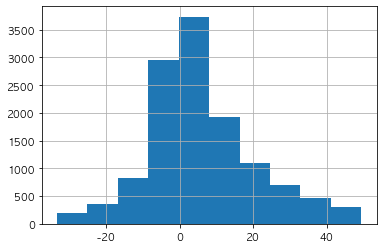

In [108]:
data3['비유동자산증가율'].hist()

In [110]:
jarque_bera(data3['비유동자산증가율'])

Jarque_beraResult(statistic=777.6162454051953, pvalue=0.0)

In [109]:
np.round(jarque_bera(data3['비유동자산증가율'])[1],3)

0.0

<AxesSubplot:>

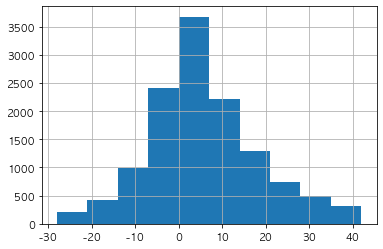

In [89]:
data3[col_list[0]].hist()
# data1[col_list[2]].reset_index()
# # aaa.hist()
# aaa.sort_values(by='유동자산증가율',ascending=False)
# aaa


In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data3['비유동자산증가율'].reset_index()
# jarque_bera(scaler.fit_transform(data3['비유동자산증가율']))
# jarque_bera(data3['비유동자산증가율'])
# data3['비유동자산증가율']

,index,비유동자산증가율
0,1,35.89
1,2,-27.05
2,3,-3.72
3,4,-1.92
4,5,-19.28
...,...,...
12558,18424,-7.17
12559,18425,-6.64
12560,18426,-0.99
12561,18427,37.49


# 4. 훈련,테스트셋 분리 및 변수 유의성 검정 시행

## 4-1 변수 유의성 검정을 위한 정규분포성, 이분산성 검정 (5.)

In [552]:
FR_list = final_df.columns[8:-4].tolist()
FR_list.append('차기부도여부')

subset = final_df[FR_list]

bc_df = subset.loc[subset['차기부도여부']=='1']
nc_df = subset.loc[subset['차기부도여부']=='0']

In [104]:
from scipy.stats import anderson, shapiro, kstest, normaltest, jarque_bera

In [480]:
# shapiro-test 시행
nm_dist = []
nnm_dist = []
for i in subset.columns[:-1]:
    Sresult = np.round(shapiro(subset[i]).pvalue,3)
    if Sresult < 0.05:
        nm_dist.append(i)
    else:
        nnm_dist.append(i)

print(len(nm_dist), len(nnm_dist))

# 하지만, data의 개수가 5000개를 초과하기 떄문에, P값이 정확하지 않을 수 있다고 함
# 따라서 다른 정규성 검정을 시행해야 함

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


157 0


In [509]:
# anderson-test 시행
# 검정통계치와 _Avals_norm : array([0.576, 0.656, 0.787, 0.918, 1.092])를 비교하여 정규성을 검정한다.
# _Avals_norm의 유의수준은 %값으로 다음 열과 매칭된다. array([15. , 10. ,  5. ,  2.5,  1. ])
# 따라서 검정통계치와 유의수준 0.05에서 임계치인 0.787을 비교하여 통계치가 더 크면 P값이 매우 유의미하므로 정규분포를 따른다는 귀무가설을 기각할 수 있다
nm_dist = []
nnm_dist = []
for i in subset.columns[:-1]:
    Aresult = anderson(subset[i])[1][2]
    if Aresult < 0.787:
        nm_dist.append(i)
    else:
        nnm_dist.append(i)

print(len(nm_dist), len(nnm_dist))

0 157


In [522]:
nm_dist = []
nnm_dist = []
for i in subset.columns[:-1]:
    Kresult = np.round(kstest(subset[i], 'norm').pvalue,3) # 정규분포와 동일하다는 귀무가설 설정
    if Kresult < 0.05: # 정규분포와 동일하다는 귀무가설을 기각할 수 있다
        nnm_dist.append(i)
    else:
        nm_dist.append(i)

print(len(nm_dist), len(nnm_dist))


0 157


In [521]:
# if p < alpha:  
# null hypothesis: x comes from a normal distribution
# ...     print("The null hypothesis can be rejected")
# ... else:
# ...     print("The null hypothesis cannot be rejected")
# The null hypothesis can be rejected

nm_dist = []
nnm_dist = []
for i in subset.columns[:-1]:
    Nresult = np.round(normaltest(subset[i])[1],3)
    if Nresult < 0.05:  # 정규분포를 따른다는 귀무가설을 기각
        nnm_dist.append(i)
    else:
        nm_dist.append(i)

print(len(nm_dist), len(nnm_dist))


0 157


In [524]:
# jarque_bera 검정 (sample 수가 2000개를 넘을 경우, 적절한 정규성 검정임)
nm_dist = []
nnm_dist = []
for i in subset.columns[:-1]:
    Nresult = np.round(jarque_bera(subset[i])[1],3)
    if Nresult < 0.05:  # 정규분포를 따른다는 귀무가설을 기각
        nnm_dist.append(i)
    else:
        nm_dist.append(i)

print(len(nm_dist), len(nnm_dist))

0 157


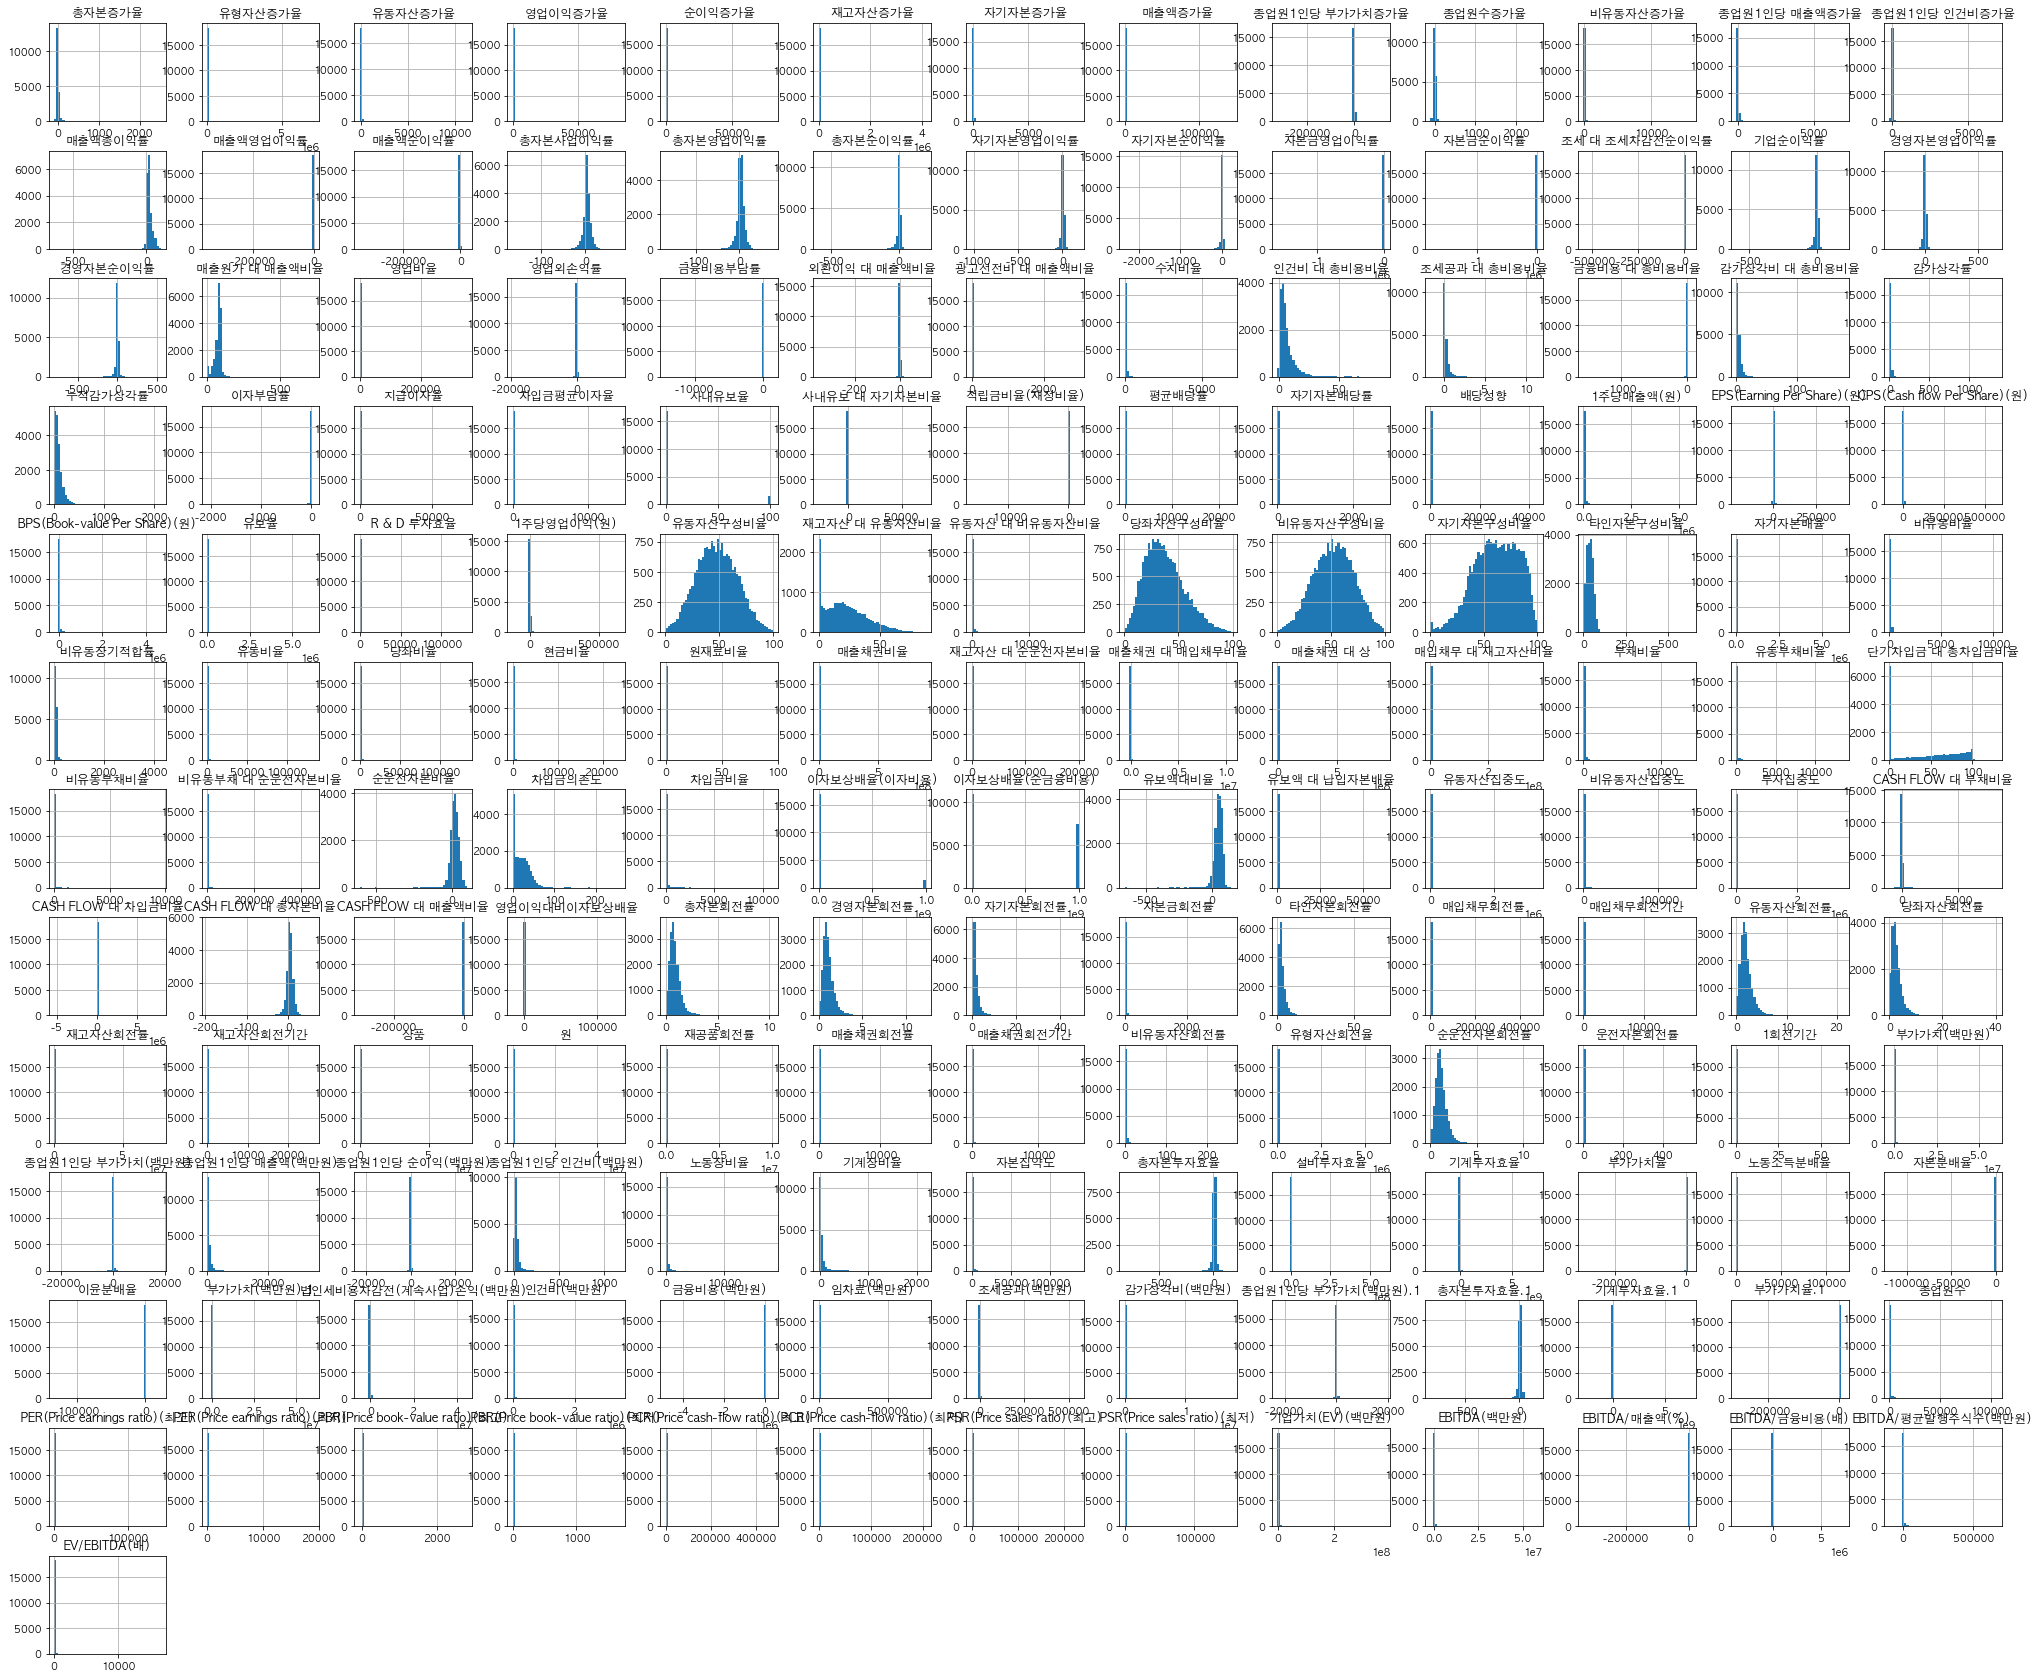

In [535]:
subset.hist(figsize = (35,30), bins = 50)
plt.show()

In [553]:
from scipy.stats import bartlett

# 정규성이 보장된 경우 시행하는 등분산성 검정으로 3개 이상의 모집단 등분산성에도 검정이 가능함.

from scipy.stats import levene

# P값이 작다면, 등분산성 가정을 유의미하게 충족하지 못한다. (이분산성을 갖는다)
# levene의 default 값이 center = median으로 설정되어 있음. 
# 따라서 정규성이 없는 집단의 등분산성 검정이 bartlett 보다는 더 강건하게 할 수 있다.

from scipy.stats import fligner

# 모집단의 분포에 대한 가정이 없이 비모수에 대한 등분산성 검정에 용이하게 사용된다.

# 위 3개의 통계검정은 'H0 = 등분산성을 충족한다.'이다.

In [554]:
FR_list = final_df.columns[8:-4].tolist()
FR_list.append('차기부도여부')

subset = final_df[FR_list]

bc_df = subset.loc[subset['차기부도여부']=='1']
nc_df = subset.loc[subset['차기부도여부']=='0']

In [477]:
# levene-test 시행
eq_var = []
neq_var = []
for i in subset.columns[:-1]:
    ser_1 = nc_df[i]
    ser_2 = bc_df[i]

    lresult = np.round(levene(ser_1, ser_2)[1],3)
    if lresult < 0.05:
        eq_var.append(i)
    else:
        neq_var.append(i)

print(len(eq_var), len(neq_var))

64 93


In [478]:
# flinger-test 시행

eq_var = []
neq_var = []
for i in subset.columns[:-1]:
    ser_1 = nc_df[i]
    ser_2 = bc_df[i]

    fresult = np.round(fligner(ser_1, ser_2)[1],3)
    if fresult < 0.05:
        eq_var.append(i)
    else:
        neq_var.append(i)

print(len(eq_var), len(neq_var))

128 29


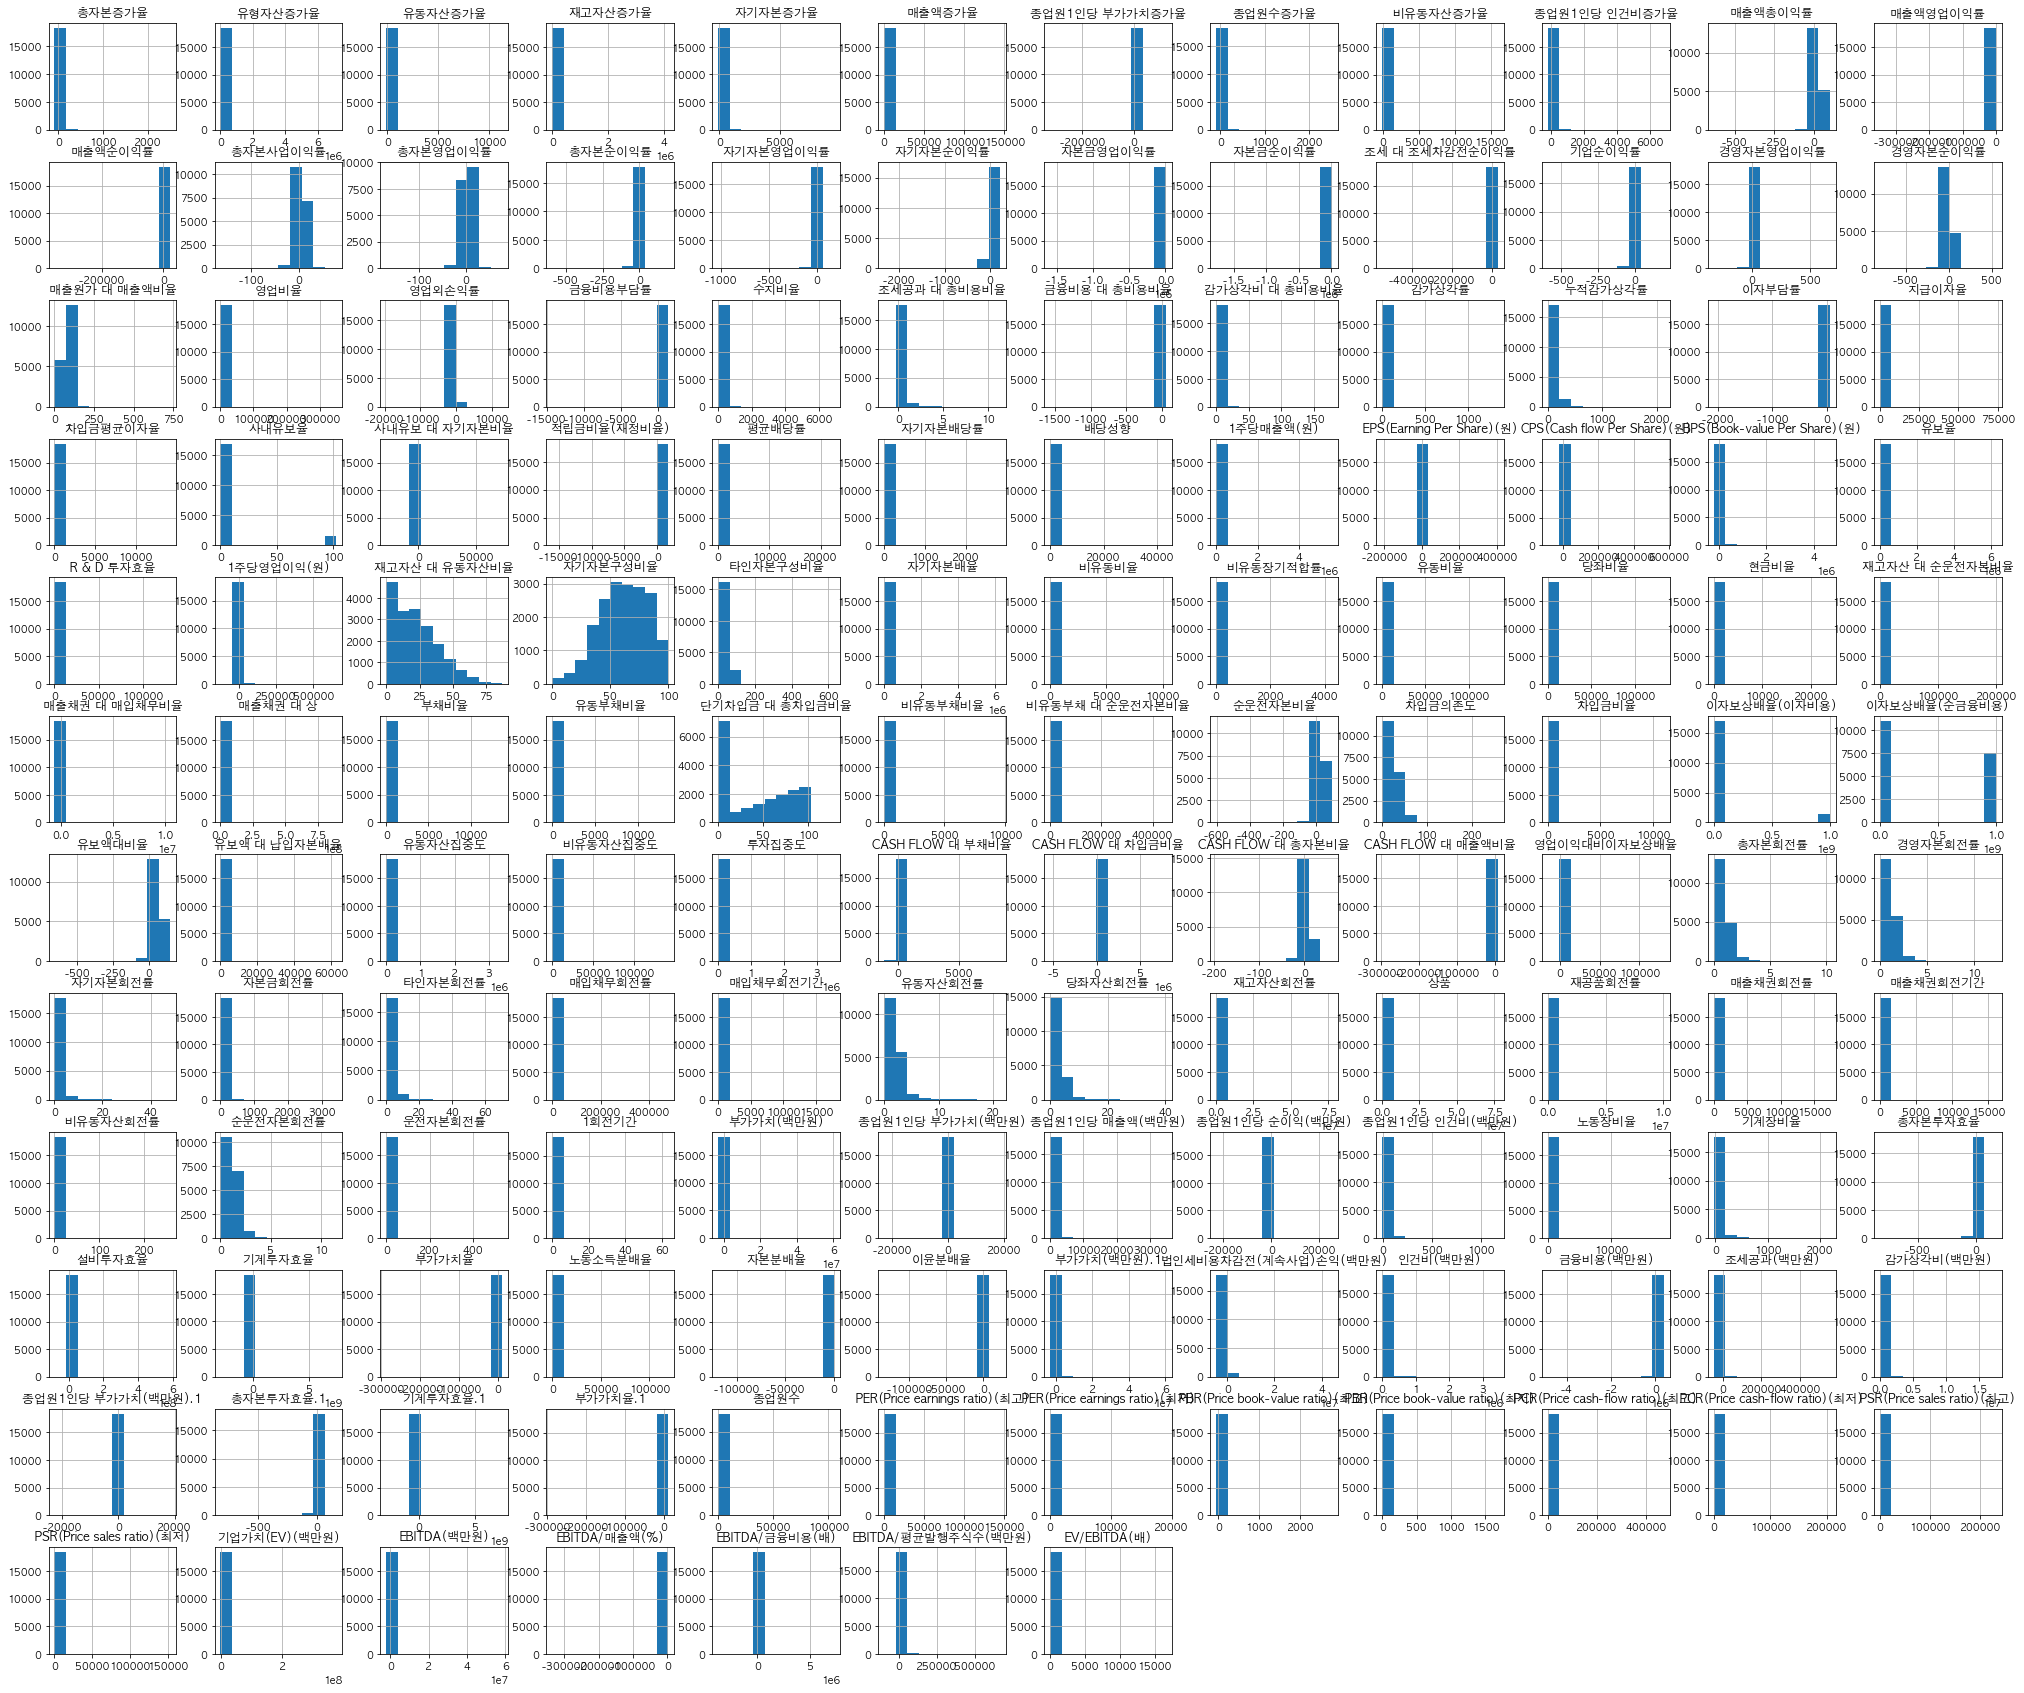

In [576]:
subset[eq_var].hist(figsize = (35,30))
plt.show()

### 4-1 결론
1.	원래 Z-test, T-test로 두 모집단 (부도 유무)의 평균이 유의미하게 다르다라는 것을 검정할 수 있다. 하지만, 모집단이 정규성을 가지고 등분산성을 가지는 경우에만 사용할 수 있기에 우리는 사용할 수 없다.
2.	우리 데이터처럼 비모수, 불균등, 등분산 성을 가지는 경우(129)에는 Mann-Whitney U를 사용할 수 있다. 하지만, 비모수, 불균등, 이분산성을 가지는 경우(29)는 사용할 수 없다는 것이 문제이다. 
3.	결론
- 이분산성을 가지는 경우, 적절한 통계적 기법이 없다. 따라서 여러 개의 방법을 시도해봐야 할 듯 하다.
    - 정규화를 해주는 Scaler 작업을 29개 feature에 실시 후, 29개에 대해 Z 검정 & T 검정 시행 (하지만, 해석상의 어려움이 일부 존재할 것 같다는 생각이 들었음)
        1.	BOX_COS 변환의 경우 사용불가 (음수, 0의 값을 가지는 경우 불가능)
    - 일관적으로 Mann-Whitney U 검정을 실시하는 법
    - 위 두가지 방법이 마땅치 않은 경우는 29개 feature Drop도 작게나마 고려한다.


## 4-2 이분산성 해결 방법 도입
- 이분산성 해결을 위한 scaler 시행
- Mann-Whitney U 검정 시행

In [546]:
# 이분산성을 가지고 비모수 형태인 데이터
subset[neq_var]

,종업원1인당 부가가치증가율,매출액총이익률,자본금순이익률,매출원가 대 매출액비율,조세공과 대 총비용비율,감가상각비 대 총비용비율,누적감가상각률,이자부담률,EPS(Earning Per Share)(원),유동자산구성비율,...,CASH FLOW 대 차입금비율,총자본회전률,경영자본회전률,유동자산회전률,재고자산회전률,상품,원,매출채권회전률,1회전기간,법인세비용차감전(계속사업)손익(백만원)
1,0.00,17.48,-20.25,82.52,0.18,1.45,19.31,-18.57,-74.0,40.55,...,0.00,0.11,0.18,0.23,11.46,20.70,0.00,0.79,0.00,-890.10
2,0.00,36.60,-65.89,63.40,0.33,2.31,23.12,8.09,-345.0,48.40,...,-94.68,0.38,0.60,0.84,10.68,16.61,63.94,2.30,0.01,-4659.44
3,0.00,24.33,-225.67,75.67,1.28,5.41,13.06,7.87,-1164.0,43.04,...,-177.68,0.35,0.45,0.76,4.90,10.66,19.99,1.75,0.00,-18176.78
4,0.00,23.74,-52.97,76.26,0.67,8.98,24.48,9.87,-331.0,48.09,...,-285.10,0.48,0.50,1.06,4.27,8.27,19.73,2.71,0.01,-7648.55
5,0.00,41.83,-5.96,58.17,0.67,6.94,22.27,1.76,-29.0,55.41,...,-91.85,0.69,0.71,1.32,6.31,9.59,40.59,2.74,0.01,-1264.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20951,32.13,4.71,195.42,95.29,0.26,0.25,252.11,-1.01,202.0,17.65,...,87.69,2.11,2.79,10.28,81.42,81.42,0.00,29.48,0.06,3745.60
20952,-7.96,5.33,145.18,94.67,0.33,0.27,251.65,0.27,150.0,18.69,...,46.83,1.83,2.68,10.07,68.96,68.96,0.00,29.72,0.06,2746.52
20953,3.78,5.07,137.65,94.93,0.32,0.26,275.66,1.06,142.0,19.87,...,22.28,1.96,2.91,10.14,58.96,58.96,0.00,27.11,0.05,2570.80
20954,16.10,5.00,157.99,95.00,0.31,0.22,290.58,-0.26,163.0,16.64,...,0.00,2.14,3.17,11.71,78.35,78.35,0.00,31.01,0.06,3013.26


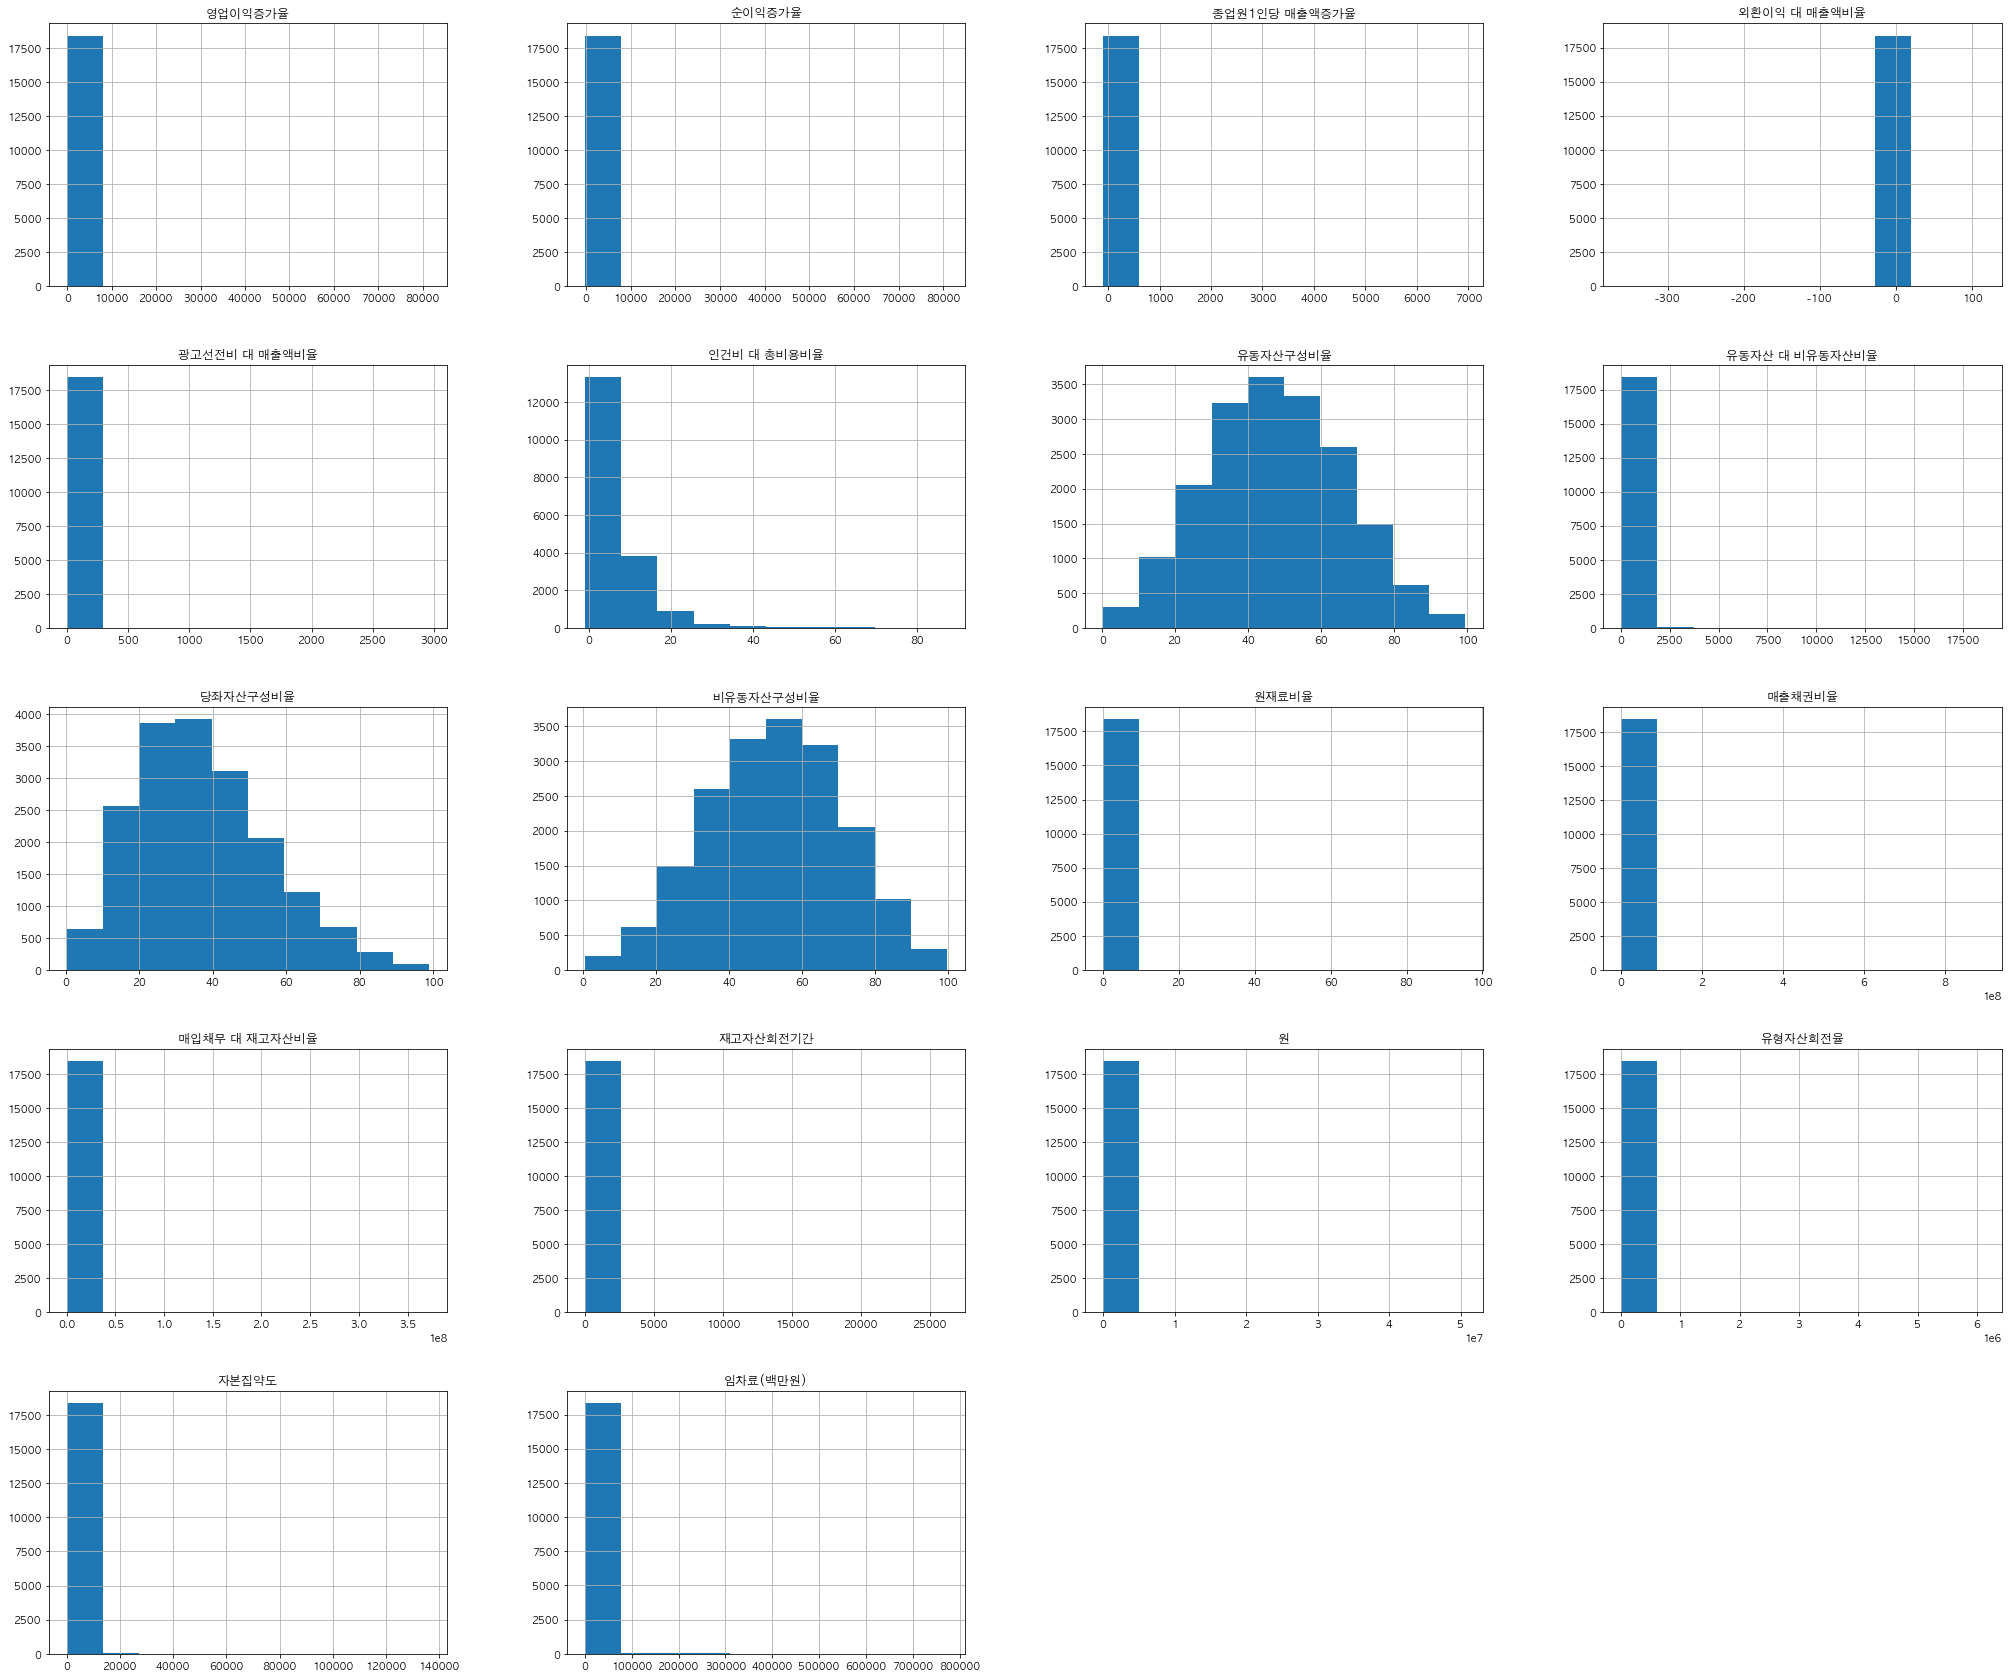

In [577]:
subset[neq_var].hist(figsize = (35,30))
plt.show()

In [578]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

subset[neq_var] = scaler.fit_transform(subset[neq_var])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [579]:
subset[neq_var]

,영업이익증가율,순이익증가율,종업원1인당 매출액증가율,외환이익 대 매출액비율,광고선전비 대 매출액비율,인건비 대 총비용비율,유동자산구성비율,유동자산 대 비유동자산비율,당좌자산구성비율,비유동자산구성비율,원재료비율,매출채권비율,매입채무 대 재고자산비율,재고자산회전기간,원,유형자산회전율,자본집약도,임차료(백만원)
1,-0.064244,-0.062184,-1.142100,0.101143,0.007006,2.636898,-0.373426,-0.239059,0.106257,0.373426,-0.056486,-0.008264,-0.008303,-0.101553,-0.009206,-0.008100,-0.166192,-0.110250
2,-0.064244,-0.062184,4.226076,-0.034399,-0.019606,1.426140,0.048582,-0.155049,0.347641,-0.048582,-0.056486,-0.008303,-0.008305,-0.090381,-0.009035,-0.008082,-0.149552,-0.107898
3,-0.064244,-0.062184,-0.046718,0.014312,-0.021323,0.783806,-0.239566,-0.214986,-0.269789,0.239566,-0.056486,-0.008340,-0.008317,0.103636,-0.009152,-0.008088,-0.167612,-0.105463
4,-0.064244,-0.062184,-0.073821,0.005840,-0.041925,1.629053,0.031917,-0.158793,-0.060812,-0.031917,-0.056486,-0.008346,-0.008322,0.156463,-0.009153,-0.008082,-0.168942,-0.100728
5,-0.064244,-0.062184,0.423699,0.005840,-0.038491,1.228602,0.425433,-0.054980,0.459393,-0.425432,-0.056486,-0.008318,-0.008321,0.023651,-0.009097,-0.008066,-0.164284,-0.097398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20951,-0.134356,0.018498,-0.241811,0.010076,-0.049651,-0.647335,-1.604508,-0.392694,-1.211858,1.604507,-0.056486,-0.008326,-0.008341,-0.233305,-0.009206,-0.008024,-0.004350,-0.111557
20952,0.062060,-0.094622,-0.155127,0.010076,-0.049651,-0.623147,-1.548598,-0.387604,-1.213535,1.548598,-0.056486,-0.008336,-0.008341,-0.229405,-0.009206,-0.008027,-0.220132,-0.111557
20953,-0.089906,-0.068732,0.016628,0.010076,-0.049651,-0.639272,-1.485163,-0.381659,-1.162687,1.485162,-0.056486,-0.008332,-0.008340,-0.225071,-0.009206,-0.008018,-0.220132,-0.111557
20954,-0.011395,-0.043537,0.089008,0.010076,-0.049651,-0.654054,-1.658804,-0.397555,-1.261029,1.658804,-0.056486,-0.008322,-0.008341,-0.232439,-0.009206,-0.008011,-0.220132,-0.111557


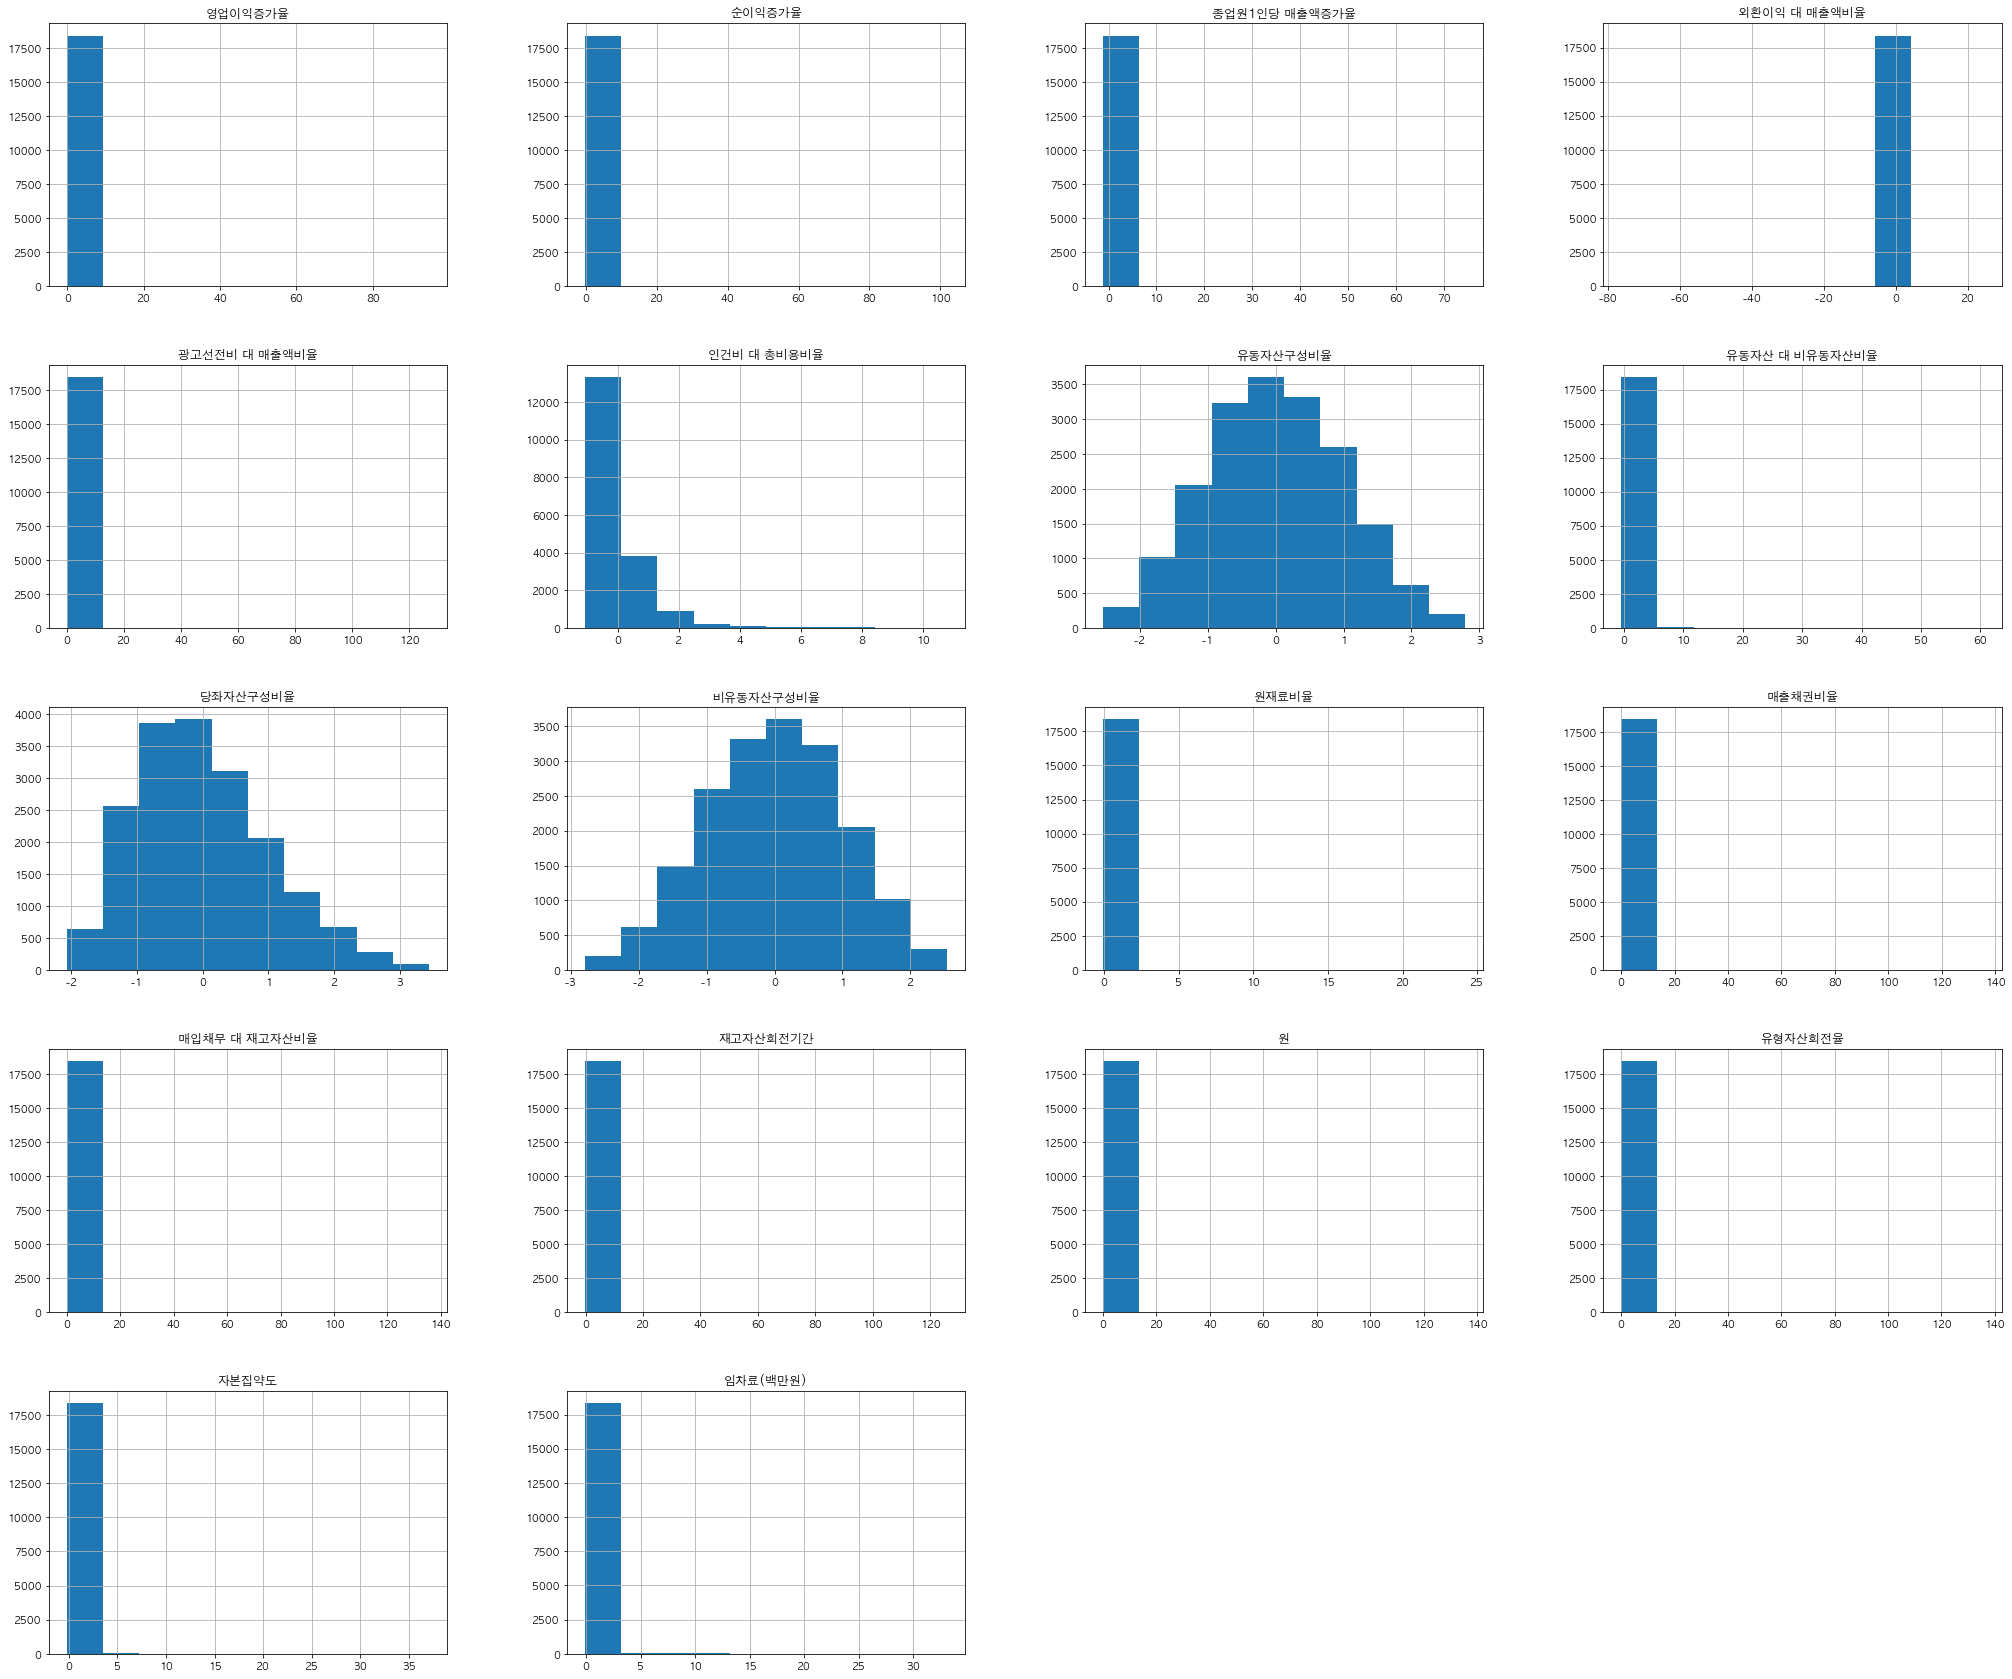

In [580]:
subset[neq_var].hist(figsize = (35,30))
plt.show()

In [542]:
bc_df1 = subset.loc[subset['차기부도여부']=='1']
nc_df1 = subset.loc[subset['차기부도여부']=='0']

In [549]:
# flinger-test 시행

eq_var1 = []
neq_var1 = []
for i in subset.columns[:-1]:
    ser_1 = nc_df1[i]
    ser_2 = bc_df1[i]

    fresult = np.round(fligner(ser_1, ser_2)[1],3)
    if fresult < 0.05:
        eq_var1.append(i)
    else:
        neq_var1.append(i)

print(len(eq_var1), len(neq_var1))

128 29


결과는 다르지 않다. (scaler를 반영하더라도 neq_var1은 기존의 neq_var과 같음)

In [581]:
FR_list = final_df.columns[8:-4].tolist()
FR_list.append('차기부도여부')

subset = final_df[FR_list]

bc_df = subset.loc[subset['차기부도여부']=='1']
nc_df = subset.loc[subset['차기부도여부']=='0']

In [566]:
from scipy.stats import mannwhitneyu, ttest_ind

1. 157개 feature 대상 MannWhitney 시행 후, T-test 시행
2. 128개(등분산성 만족) feature 대상 MannWhitney 시행 후, T-test 시행
3. 157개 feature 대상 T-test 시행 후, MannWhitney시행
4. 128개(등분산성 만족) feature 대상 T-test 시행 후, MannWhitney 시행

In [570]:
# 1st
# mannwhitneyu 시행 후 t-test

sig_diff = []
nsig_diff = []
for i in subset.columns[:-1]:
    ser_1 = nc_df[i]
    ser_2 = bc_df[i]

    fresult = np.round(mannwhitneyu(ser_1, ser_2)[1],3)
    if fresult < 0.01:
        sig_diff.append(i)
    else:
        nsig_diff.append(i)

print(len(sig_diff), len(nsig_diff))

129 28


In [573]:
sig_diff1 = []
nsig_diff1 = []
for i in sig_diff:
    ser_1 = nc_df[i]
    ser_2 = bc_df[i]

    fresult = np.round(ttest_ind(ser_1, ser_2)[1],3)
    if fresult < 0.01:
        sig_diff1.append(i)
    else:
        nsig_diff1.append(i)

print(len(sig_diff1), len(nsig_diff1))

62 67


In [574]:
# 2nd 
# eq_var 대상 mannwhitneyu 시행 후 t-test

sig_diff = []
nsig_diff = []
for i in eq_var:
    ser_1 = nc_df[i]
    ser_2 = bc_df[i]

    fresult = np.round(mannwhitneyu(ser_1, ser_2)[1],3)
    if fresult < 0.01:
        sig_diff.append(i)
    else:
        nsig_diff.append(i)

print(len(sig_diff), len(nsig_diff))

129 10


In [586]:
sig_diff1 = []
nsig_diff1 = []
for i in sig_diff:
    ser_1 = nc_df[i]
    ser_2 = bc_df[i]

    fresult = np.round(ttest_ind(ser_1, ser_2)[1],3)
    if fresult < 0.01:
        sig_diff1.append(i)
    else:
        nsig_diff1.append(i)

print(len(sig_diff1), len(nsig_diff1))

62 67


In [588]:
# 3rd
# t-test 후 mannwhitneyu
sig_diff = []
nsig_diff = []
for i in subset.columns[:-1]:
    ser_1 = nc_df[i]
    ser_2 = bc_df[i]

    fresult = np.round(ttest_ind(ser_1, ser_2)[1],3)
    if fresult < 0.01:
        sig_diff.append(i)
    else:
        nsig_diff.append(i)

print(len(sig_diff), len(nsig_diff))

63 94


In [589]:
sig_diff1 = []
nsig_diff1 = []
for i in sig_diff:
    ser_1 = nc_df[i]
    ser_2 = bc_df[i]

    fresult = np.round(mannwhitneyu(ser_1, ser_2)[1],3)
    if fresult < 0.01:
        sig_diff1.append(i)
    else:
        nsig_diff1.append(i)

print(len(sig_diff1), len(nsig_diff1))

62 1


In [590]:
# 4st
# eq_var 대상 t-test 시행 후 mannwhitneyu
sig_diff = []
nsig_diff = []
for i in eq_var:
    ser_1 = nc_df[i]
    ser_2 = bc_df[i]

    fresult = np.round(ttest_ind(ser_1, ser_2)[1],3)
    if fresult < 0.01:
        sig_diff.append(i)
    else:
        nsig_diff.append(i)

print(len(sig_diff), len(nsig_diff))

62 77


In [591]:
sig_diff1 = []
nsig_diff1 = []
for i in sig_diff:
    ser_1 = nc_df[i]
    ser_2 = bc_df[i]

    fresult = np.round(mannwhitneyu(ser_1, ser_2)[1],3)
    if fresult < 0.01:
        sig_diff1.append(i)
    else:
        
        nsig_diff1.append(i)

print(len(sig_diff1), len(nsig_diff1))

62 0


In [404]:
test = final_df[final_df['회계년도_new'] >= 2018]
train = final_df[final_df['회계년도_new'] < 2018]

In [405]:
FR_list = final_df.columns[8:-4].tolist()
FR_list.append('차기부도여부')
train = train[FR_list]
test = test[FR_list]
# bc_df = subset1.loc[subset1['차기부도여부']=='1']
# nc_df = subset1.loc[subset1['차기부도여부']=='0']

In [406]:
print(len(train), len(test))

15165 3276


In [407]:
test.to_csv('{}test.csv'.format(path), index=False)
train.to_csv('{}train.csv'.format(path), index=False)

modeling

In [408]:
# data 분활
y_train = train['차기부도여부']
X_train = train.drop(columns = '차기부도여부')
X_test = test.drop(columns = '차기부도여부')
y_test = test['차기부도여부']

In [412]:
X_train.shape

(15165, 157)

TLqkf dksgo

In [ ]:
import random
random.sample(X_train, k=2)

In [446]:
from sklearn.feature_selection import SelectKBest, f_classif

selectK = SelectKBest(score_func=f_classif, k=8)
X = selectK.fit_transform(X_train, y_train)

In [447]:
X

array([[  -5.55,   -6.41,   -8.06, ...,  -16.81,   -1.69,   -1.69],
       [ -16.46,  -20.5 ,  -14.86, ...,  -15.83,   -2.66,   -2.66],
       [ -63.34, -106.4 ,  -60.16, ...,  -26.2 ,  -50.5 ,  -50.5 ],
       ...,
       [   3.98,    4.36,    3.9 , ...,    5.62,   10.04,   10.04],
       [   2.77,    3.17,    2.8 , ...,    3.55,    8.84,    8.84],
       [   2.6 ,    2.97,    2.73, ...,    1.67,    8.8 ,    8.8 ]])

In [450]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
rfe = RFE(model, 8)
fit = rfe.fit(X_train, y_train)

print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

TypeError: __init__() takes 2 positional arguments but 3 were given

In [444]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

train_new = SelectKBest(chi2, k=2).fit_transform(X_train, y_train)
print(train_new.shape)

ValueError: Input X must be non-negative.

In [445]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=50, random_state=42), threshold="median")

from sklearn.model_selection import train_test_split
columns = []
X_train, X_test, y_train, y_test = train_test_split(train[columns], train['is_attributed'], test_size=0.33, random_state=10)

select.fit(X_train[columns],y_train)
X_train_li = select.transform(train[columns])
print("X_train.shape: {}".format(X_train.shape))
print("X_train_li.shape: {}".format(X_train_li.shape))


mask = select.get_support()
print(list(zip(mask,X_train.columns)))
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Feature Number")

KeyError: 'is_attributed'

In [435]:
from sklearn.ensemble import RandomForestClassifier

# 분류기
forest = RandomForestClassifier(n_estimators = 500, random_state = 1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_ 


In [440]:
feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators = 1000, random_state = 0, n_jobs = -1)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1] 
# np.argsort() : 작은 것 부터 순서대로 뽑아내는 index
# [::-1] 다시 역순으로

for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' % (f +1, 30, feat_labels[indices[f]], importances[indices[f]]))
    # 순서, 30으로 나누기, 인덱스와 중요도 출력


 1) 기업순이익률                         0.013563
 2) 자기자본순이익률                       0.013119
 3) 총자본순이익률                        0.012909
 4) 사내유보 대 자기자본비율                  0.011931
 5) 단기차입금 대 총차입금비율                 0.010635
 6) 적립금비율(재정비율)                    0.010213
 7) 경영자본순이익률                       0.010124
 8) 자기자본영업이익률                      0.010084
 9) 외환이익 대 매출액비율                   0.009859
10) CASH FLOW 대 총자본비율              0.009832
11) 현금비율                           0.009482
12) 총자본증가율                         0.009450
13) 총자본투자효율                        0.009418
14) 총자본투자효율.1                      0.009386
15) 비유동자산증가율                       0.009282
16) 종업원1인당 인건비증가율                  0.008918
17) 재고자산증가율                        0.008846
18) 금융비용부담률                        0.008844
19) 유동부채비율                         0.008769
20) 매출액증가율                         0.008650
21) 종업원1인당 순이익(백만원)                0.008631
22) 부채비율                           0.008528
23) 유형자산증가율                     

In [442]:
sfm = SelectFromModel(rf, threshold = 'median', prefit = True)
print('Number of features before selection : {}'.format(X_train.shape[1]))

# sfm 적용
n_features = sfm.transform(X_train).shape[1]

print("feature selection 후 feature 수 : {}". format(n_features))

selected_vars = list(feat_labels[sfm.get_support()])


Number of features before selection : 157


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


feature selection 후 feature 수 : 79


In [443]:
selected_vars

['총자본증가율',
 '유형자산증가율',
 '유동자산증가율',
 '재고자산증가율',
 '자기자본증가율',
 '매출액증가율',
 '종업원수증가율',
 '비유동자산증가율',
 '종업원1인당 매출액증가율',
 '종업원1인당 인건비증가율',
 '매출액순이익률',
 '총자본사업이익률',
 '총자본영업이익률',
 '총자본순이익률',
 '자기자본영업이익률',
 '자기자본순이익률',
 '기업순이익률',
 '경영자본영업이익률',
 '경영자본순이익률',
 '영업외손익률',
 '금융비용부담률',
 '외환이익 대 매출액비율',
 '수지비율',
 '금융비용 대 총비용비율',
 '감가상각률',
 '누적감가상각률',
 '이자부담률',
 '지급이자율',
 '차입금평균이자율',
 '사내유보 대 자기자본비율',
 '적립금비율(재정비율)',
 'CPS(Cash flow Per Share)(원)',
 'BPS(Book-value Per Share)(원)',
 '유보율',
 '자기자본구성비율',
 '타인자본구성비율',
 '자기자본배율',
 '비유동장기적합률',
 '현금비율',
 '재고자산 대 순운전자본비율',
 '매출채권 대 상',
 '부채비율',
 '유동부채비율',
 '단기차입금 대 총차입금비율',
 '비유동부채비율',
 '차입금의존도',
 '차입금비율',
 '유보액대비율',
 '유보액 대 납입자본배율',
 '투자집중도',
 'CASH FLOW 대 부채비율',
 'CASH FLOW 대 차입금비율',
 'CASH FLOW 대 총자본비율',
 'CASH FLOW 대 매출액비율',
 '매입채무회전기간',
 '원',
 '매출채권회전률',
 '매출채권회전기간',
 '순운전자본회전률',
 '운전자본회전률',
 '부가가치(백만원)',
 '종업원1인당 부가가치(백만원)',
 '종업원1인당 순이익(백만원)',
 '총자본투자효율',
 '설비투자효율',
 '기계투자효율',
 '부가가치율',
 '부가가치(백만원).1',
 '금융비용(백만원)',
 '종업원1인당 부가가치(백만원).1',
 '총자본투자효율.1',
 '기

In [438]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold = 0.05, prefit = True)
# forest 모델 내 특성 중 지니계수 혹은 엔트로피 등 기준의 값이 0.1 이상일 경우의 특징을 선택 

x_selected = sfm.transform(X_train)


print('이 임계 조건을 만족하는 샘플의 수:', x_selected.shape[1])


이 임계 조건을 만족하는 샘플의 수: 0


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_base.py:92: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn(


In [409]:
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.ensemble import RandomForestClassifier

In [410]:
randforest = RandomForestClassifier(n_estimators=100, random_state=0)
select_model = SelectFromModel(randforest, threshold='median').fit(X_train, y_train)

select_uni = SelectPercentile(percentile=50).fit(X_train, y_train)

/var/folders/1v/ctxpzb994v98h43xyk972tmc0000gn/T/ipykernel_7140/2849266950.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ones = np.ones(X_train.shape[1], dtype=np.bool)


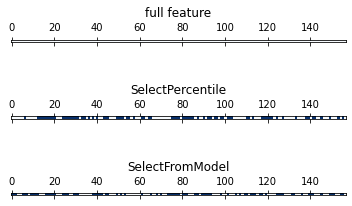

In [415]:
models = [select_uni, select_model]
_, axes = plt.subplots(3, 1)

ones = np.ones(X_train.shape[1], dtype=np.bool)
axes[0].matshow(ones.reshape(1, -1), cmap='Blues')
axes[0].set_yticks([])
axes[0].set_title('full feature')

for model, ax in zip(models, [axes[1], axes[2]]):
    x_train_model = model.transform(X_train)
    x_test_model = model.transform(X_test)

    idx = model.get_support()
    ax.matshow(idx.reshape(1, -1), cmap='Blues')
    ax.set_yticks([])
    ax.set_title('{}'.format(model.__class__.__name__))
plt.show()

In [434]:
np.array(X_train.columns) * idx
# idx

array(['총자본증가율', '유형자산증가율', '유동자산증가율', '', '', '재고자산증가율', '자기자본증가율',
       '매출액증가율', '', '종업원수증가율', '비유동자산증가율', '종업원1인당 매출액증가율',
       '종업원1인당 인건비증가율', '', '', '', '총자본사업이익률', '총자본영업이익률', '총자본순이익률',
       '자기자본영업이익률', '자기자본순이익률', '', '', '', '기업순이익률', '경영자본영업이익률',
       '경영자본순이익률', '', '', '영업외손익률', '금융비용부담률', '외환이익 대 매출액비율', '', '',
       '', '', '', '', '감가상각률', '누적감가상각률', '이자부담률', '지급이자율', '차입금평균이자율',
       '', '사내유보 대 자기자본비율', '적립금비율(재정비율)', '', '', '', '1주당매출액(원)', '',
       'CPS(Cash flow Per Share)(원)', '', '유보율', '', '', '', '', '', '',
       '', '자기자본구성비율', '', '', '', '비유동장기적합률', '', '', '현금비율', '',
       '매출채권비율', '', '', '매출채권 대 상', '매입채무 대 재고자산비율', '부채비율', '유동부채비율',
       '단기차입금 대 총차입금비율', '비유동부채비율', '', '순운전자본비율', '차입금의존도', '차입금비율', '',
       '', '', '유보액 대 납입자본배율', '유동자산집중도', '', '투자집중도', 'CASH FLOW 대 부채비율',
       'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율', '',
       '', '', '', '자본금회전률', '', '', '매입채무회전기간', '', '', '', '재고자산회전기간',
       

In [344]:
# final_df[final_df['차기부도여부'] == '1']['회계년도_new'].value_counts().reset_index()

# 해야할 일
1. train, validation, test 3가지로 기간을 분리해야 합니다.
2. 부도기업 리스트를 활용하여 data를 분류하는 작업을 수행해야 합니다.
3. data를 분류하게 된다면 모집단을 2개로 나눈 후에 T-test를 시행합니다. (financial_ratio를 활용하여 진행)
   1. 하지만, t-test에 대한 가정 (모집단의 정규분포성 등)이 충족되는지 확인해야 합니다.

In [ ]:
year_list = list(filter(lambda x: x, range(2000,2021,1)))